In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
plt.rcParams["figure.figsize"] = (16,9)

In [2]:
database = pd.read_csv('hipertensao.csv', sep=';', low_memory=False)

In [3]:
database.shape

(25000, 942)

# Pré-proscessamento - Removendo variáveis não importantes para o problema

In [4]:
listas = [
    ["C001", "C00301", "C004", "C00701", "C00702", "C00703", "C011", "C012"],
    ["D001", "D003", "D004", "D005", "D006", "D007", "D008", "D009", "D010", "D011", "D012", "D013", "D014", "D015"],
    ["E004", "E005", "E006", "E007", "E008", "E01001", "E01002", "E01003", "E01201", "E01501", "E01601", "E01603", "E01605", "E01801", "E01803", "E01805", "E020", "E021", "E022", "E023", "E024", "E025", "E02501", "E02502", "E026", "E027"],
    ["F001", "F00102", "F007", "F00702", "F008", "F00802"],
    ["G001", "G002", "G00201", "G003", "G004", "G005", "G006", "G007", "G00701", "G008", "G009", "G010", "G014", "G015", "G01501", "G016", "G017", "G018", "G021", "G022", "G02201", "G023", "G024", "G02501", "G02502", "G02503", "G026", "G027", "G032"],
    ["I002", "I003", "I004", "I005", "I006", "I007", "I00701", "I008", "I009", "I010", "I011"],
    ["J002", "J003", "J004", "J005", "J006", "J007", "J008", "J009", "J010", "J013", "J014", "J015", "J016", "J017", "J018", "J019", "J020", "J021", "J022", "J023", "J024", "J025", "J026", "J027", "J029", "J030", "J031", "J032", "J033", "J034", "J035", "J036", "J037", "J038", "J039", "J04001", "J04002", "J041", "J042", "J043", "J044", "J045", "J046", "J047", "J048", "J049", "J050", "J051", "J052", "J053", "J054", "J055", "J056", "J057", "J058", "J059", "J060"],
    ["K001", "K002", "K003", "K004", "K005", "K006", "K007", "K008", "K009", "K010", "K011", "K012", "K013", "K014", "K015", "K016", "K017", "K018", "K019", "K020", "K021", "K022", "K023", "K024", "K025", "K026", "K027", "K028", "K029", "K030", "K031", "K032", "K033", "K034", "K035", "K036", "K039", "K040", "K041", "K042", "K043", "K044", "K045", "K046", "K047", "K048", "K049", "K050", "K051", "K052", "K053", "K054", "K055", "K056", "K057", "K058", "K059", "K06001", "K06002", "K06003", "K06101", "K06102", "K062"],
    ["L00201", "L00202", "L00203", "L003", "L004", "L005", "L006", "L007", "L008", "L009", "L010", "L011", "L012", "L013", "L014", "L015", "L01613", "L01614", "L01615", "L01616", "L01617", "L01618", "L01619", "L01620", "L01621", "L01622", "L01623", "L01624", "L01701", "L01702", "L01703", "L01704", "L01705", "L01706", "L01707", "L01708", "L01709", "L01710", "L01711", "L01712", "L01713", "L01714", "L01715", "L01716", "L018", "L019", "L020"],
    ["M001", "M002", "M003", "M005", "M01301", "M01302", "M01303", "M017", "M018", "M019"],
    ["N007", "N008", "N019", "N020", "N021", "N022", "N023"],
    ["O004", "O005", "O006", "O007", "O008", "O009", "O00901", "O010", "O011", "O012", "O013", "O014", "O015", "O016", "O017", "O01801", "O01802", "O019", "O020", "O021", "O02101", "O022", "O023", "O024", "O025", "O027", "O028", "O029", "O030", "O031", "O032", "O033", "O034", "O035", "O036", "O037", "O038", "O039", "O040", "O041", "O042", "O043", "O044", "O045", "O046", "O047", "O048"],
    ["P004", "P00401", "P021", "P030", "P036", "P046", "P047", "P048", "P049", "P052", "P057", "P060", "P061", "P062", "P063", "P064", "P065", "P066", "P069", "P07001", "P07002", "P07003", "P071", "P072"],
    ["Q003", "Q004", "Q005", "Q006", "Q007", "Q008", "Q009", "Q010", "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q01801", "Q01802", "Q01803", "Q01804", "Q01805", "Q01806", "Q01807", "Q01808", "Q01901", "Q01902", "Q01903", "Q01904", "Q01905", "Q020", "Q021", "Q022", "Q023", "Q024", "Q026", "Q027", "Q028", "Q029", "Q030", "Q031", "Q032", "Q033", "Q03401", "Q03402", "Q035", "Q036", "Q037", "Q038", "Q039", "Q040", "Q041", "Q042", "Q043", "Q044", "Q045", "Q04601", "Q04602", "Q04603", "Q04604", "Q04605", "Q04606", "Q04607", "Q04608", "Q04609", "Q04701", "Q04702", "Q04703", "Q04704", "Q04705", "Q048", "Q049", "Q050", "Q051", "Q052", "Q053", "Q054", "Q05501", "Q05502", "Q05503", "Q05504", "Q05505", "Q05506", "Q05507", "Q05508", "Q05509", "Q056", "Q057", "Q058", "Q059", "Q060", "Q061", "Q06201", "Q06202", "Q06203", "Q06204", "Q06205", "Q06206", "Q063", "Q06301", "Q06302", "Q06303", "Q06304", "Q064", "Q06501", "Q06502", "Q06503", "Q06504", "Q066", "Q067", "Q068", "Q069", "Q070", "Q071", "Q07201", "Q07202", "Q07203", "Q07204", "Q07205", "Q07206", "Q073", "Q074", "Q075", "Q076", "Q07701", "Q07702", "Q078", "Q079", "Q080", "Q08101", "Q08102", "Q08103", "Q08104", "Q08105", "Q082", "Q083", "Q084", "Q085", "Q08601", "Q08603", "Q08604", "Q08605", "Q087", "Q088", "Q089", "Q09001", "Q09003", "Q09004", "Q09005", "Q091", "Q092", "Q093", "Q094", "Q095", "Q09601", "Q09602", "Q09603", "Q097", "Q098", "Q100", "Q101", "Q102", "Q103", "Q104", "Q105", "Q106", "Q107", "Q108", "Q109", "Q110", "Q11001", "Q11002", "Q11003", "Q11004", "Q111", "Q112", "Q113", "Q11401", "Q11402", "Q11403", "Q115", "Q116", "Q11601", "Q11602", "Q11603", "Q117", "Q11801", "Q11802", "Q11803", "Q11804", "Q119", "Q120", "Q121", "Q122", "Q123", "Q124", "Q125", "Q12601", "Q12602", "Q12603", "Q12604", "Q12605", "Q127", "Q128", "Q130", "Q131", "Q132", "Q133", "Q134", "Q135", "Q136", "Q137"],
    ["R001", "R002", "R003", "R004", "R005", "R006", "R007", "R008", "R009", "R010", "R011", "R012", "R013", "R014", "R015", "R016", "R017", "R018", "R019", "R020", "R021", "R022", "R023", "R024", "R025", "R026", "R027", "R028", "R029", "R030", "R031", "R032", "R033", "R034", "R035", "R03601", "R03602", "R03603", "R03604", "R03605", "R03606", "R03607", "R03608", "R03609", "R03610", "R03611", "R037", "R038", "R039", "R040", "R041", "R04101", "R042", "R04201", "R043", "R044", "R045", "R046", "R047", "R048", "R04901", "R04902", "R04903"], 
    ["S001", "S002", "S003", "S004", "S005", "S006", "S007", "S008", "S009", "S01001", "S01002", "S01003", "S01004", "S01005", "S01101", "S01102", "S01103", "S012", "S013", "S01401", "S01402", "S01403", "S01404", "S01405", "S015", "S016", "S017", "S018", "S019", "S020", "S021", "S022", "S023", "S024", "S025", "S026", "S027", "S028", "S029", "S030", "S031", "S032", "S033", "S034", "S035", "S036", "S037", "S038", "S039", "S040", "S041", "S042", "S043", "S044", "S045", "S046", "S047", "S048", "S049", "S050", "S051", "S052", "S053", "S054", "S055", "S056", "S057", "S058"], 
    ["U001", "U00201", "U00202", "U00203", "U004", "U005", "U006", "U009", "U010", "U011", "U014", "U015", "U01701", "U01702", "U01801", "U01802", "U019", "U020", "U021", "U022", "U023", "U02301", "U024", "U02401", "U025"],
    ["X003", "X004", "X005", "X006", "X007", "X008", "X011", "X012", "X01401", "X01402", "X01501", "X01502", "X016", "X017", "X018", "X019", "X02001", "X02002", "X02003", "X02004", "X02005", "X02006", "X02201", "X02202", "X02203", "X02204", "X02205", "X02206", "X024", "X02501", "X02502", "X02503", "X02504", "X02505", "X02506", "X02507", "X02508", "X02509", "X02510"],      
    ["VDF001", "VDF00102", "V0024", "UPA_PNS", "V0006_PNS", "UPA", "V0025", "W00101", "W00102", "W00103", "W00201", "W00202", "W00203", "W00301", "W00302", "W00303", "W00401", "W00402", "W00403", "W00404", "W00405", "W00406", "W00407", "W00408", "V0028", "V0029", "V00281", "V00291", "V00282", "V00292", "V00283", "V00293", "VDD004", "VDE001", "VDE002", "VDDATAM"]
]

In [5]:
for lista in listas:
    database.drop(columns=lista, inplace=True)

# Mostrando quantidade de atributos não nulos da base

In [6]:
database.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 152 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0001   25000 non-null  int64  
 1   C006    25000 non-null  int64  
 2   C008    25000 non-null  int64  
 3   C009    25000 non-null  int64  
 4   C010    25000 non-null  float64
 5   D002    25000 non-null  float64
 6   E001    25000 non-null  float64
 7   E002    12465 non-null  float64
 8   E003    12420 non-null  float64
 9   E011    13502 non-null  float64
 10  E014    13502 non-null  float64
 11  E01602  25000 non-null  object 
 12  E01604  25000 non-null  object 
 13  E017    25000 non-null  object 
 14  E01802  25000 non-null  object 
 15  E01804  25000 non-null  object 
 16  E019    25000 non-null  object 
 17  I001    25000 non-null  int64  
 18  J001    25000 non-null  int64  
 19  J011    25000 non-null  int64  
 20  J012    25000 non-null  object 
 21  M006    2047 non-null   float64
 2

# Descrevendo a base

In [7]:
database.describe()

,V0001,C006,C008,C009,C010,D002,E001,E002,E003,E011,...,P05419,P055,P056,P058,P067,P068,Q001,Q002,X001,X002
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,12465.000000,12420.000000,13502.000000,...,3518.000000,3032.000000,2843.000000,5195.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,19919.000000
mean,30.631520,1.597880,48.432080,2.574600,1.433160,1.930000,1.498600,1.996390,1.961272,1.051178,...,4.967595,2.434697,2.040802,1.572089,2.992800,4.352200,1.471040,2.00000,3.045360,4.582509
std,11.869238,0.490336,17.250726,1.435729,0.495522,0.255152,0.500008,0.059978,0.192953,0.240613,...,0.349786,1.086352,0.536909,1.275019,0.110039,1.430775,0.989182,1.00002,1.475706,2.045842
min,11.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,23.000000,1.000000,34.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,5.000000,2.000000,2.000000,1.000000,3.000000,5.000000,1.000000,1.00000,1.000000,4.000000
50%,31.000000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,5.000000,2.000000,2.000000,1.000000,3.000000,5.000000,1.000000,2.00000,3.000000,4.000000
75%,41.000000,2.000000,61.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,5.000000,4.000000,2.000000,1.000000,3.000000,5.000000,1.000000,3.00000,4.000000,7.000000
max,53.000000,2.000000,101.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,5.000000,4.000000,4.000000,6.000000,3.000000,5.000000,5.000000,3.00000,6.000000,8.000000


# Balanceamento dos dados

In [8]:
# Tanto a contagem de valores quanto o primeiro gráfico abaixo mostra que
# a base já está perfeitamente balanceada (50-50 dos hipertensos)
database['Q002'].value_counts()

3.0    12500
1.0    12500
Name: Q002, dtype: int64

# Gráficos

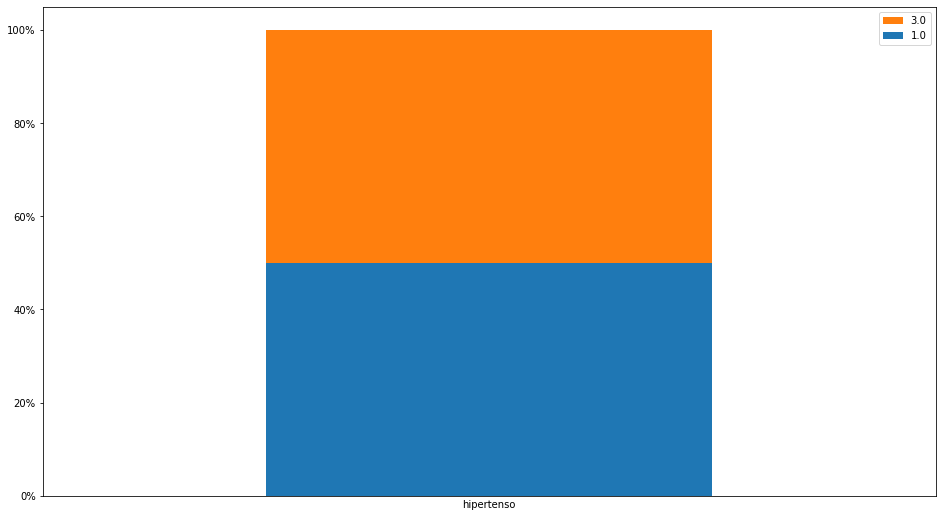

In [9]:
# create dummy variable then group by that
# set the legend to false because we'll fix it later
database.assign(dummy = 1).groupby(
  ['dummy','Q002']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel("hipertenso")

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(database['Q002'].unique())

#plt.figure(figsize=(400,300))
plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#1.0 - diagnosticado com hipertensão, 3.0 - não diagnosticado com hipertensão

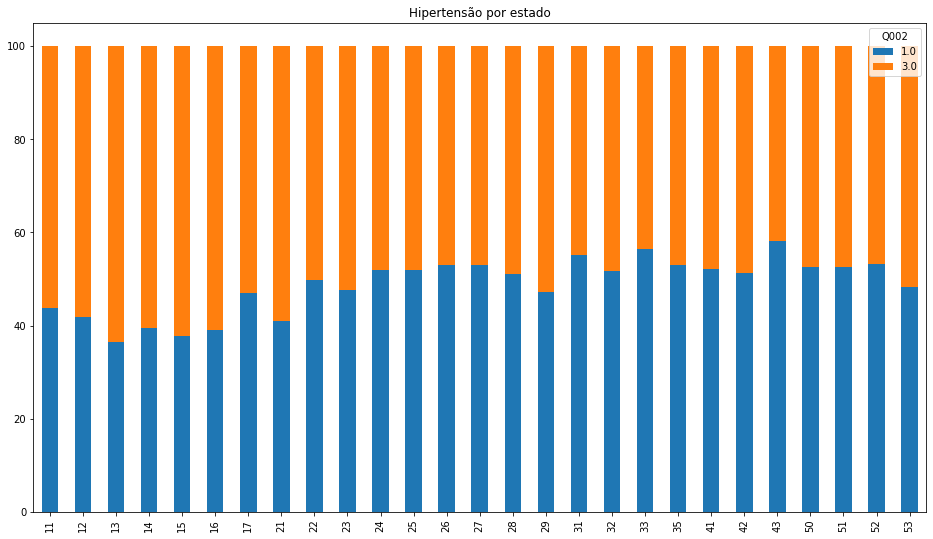

In [10]:
database.groupby(['V0001','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por estado')
plt.xlabel("")
plt.show()

# 11-17 Norte
#21-29 Nordeste
#31-33 Sudeste
#41-43 Sul
#50-53 Centro-Oeste (e DF)

In [12]:
testeRegioes = database

regiao = testeRegioes['V0001']

for i in range(25000):
    regiao.iloc[i] = regiao.iloc[i] // 10

testeRegioes['regiao'] = regiao

testeRegioes['regiao'].value_counts()

C:\Users\madof\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2    7484
3    6271
1    4733
4    3303
5    3209
Name: regiao, dtype: int64

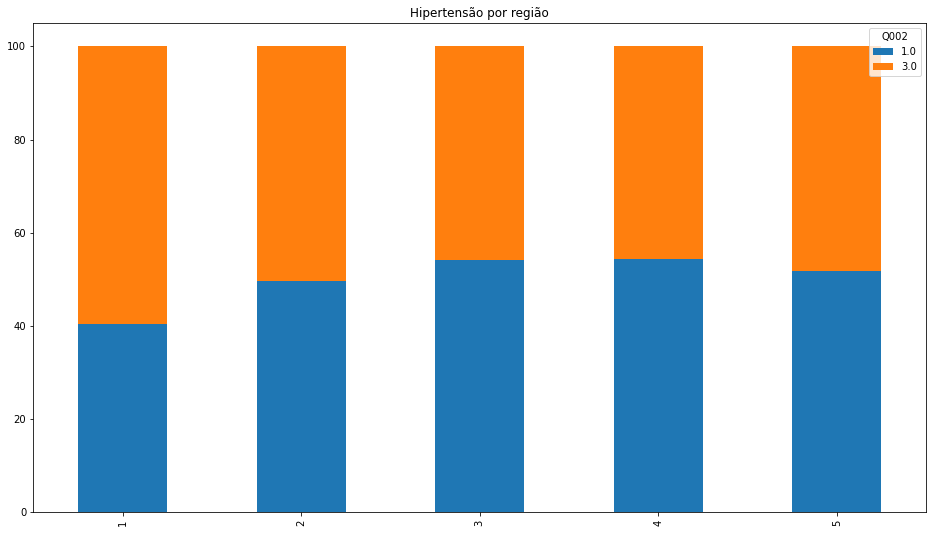

In [13]:
testeRegioes.groupby(['regiao','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por região')
plt.xlabel("")
plt.show()

# 1 Norte <<- eliminar
# 2 Nordeste
# 3 Sudeste
# 4 Sul
# 5 Centro-Oeste (e DF)

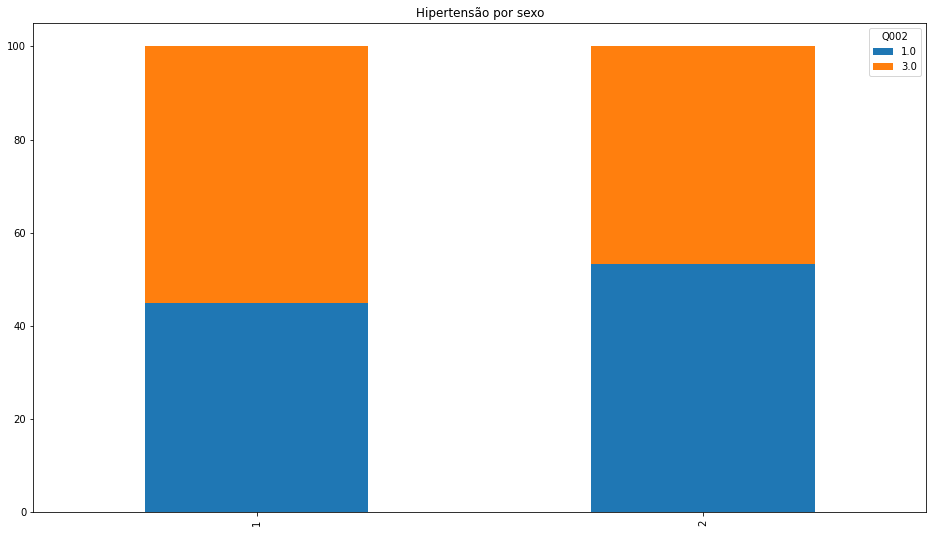

In [14]:
database.groupby(['C006','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por sexo')
plt.xlabel("")
plt.show()

# 1 - Masculino, 2 - Feminino

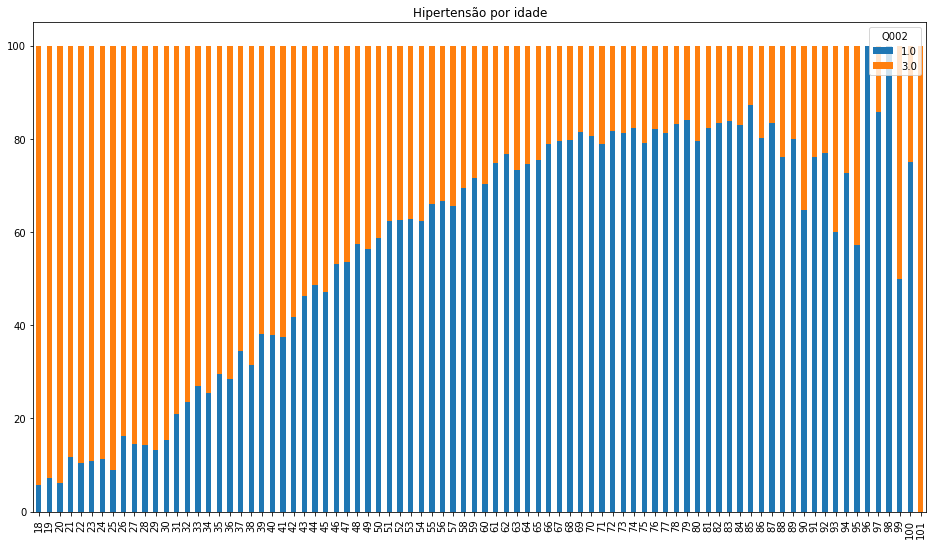

In [15]:
database.groupby(['C008','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por idade')
plt.xlabel("")
plt.show()

# Cortar acima de 25 anos

In [11]:
lista = database[database['C008'] <= 25]['C008'].value_counts()
lista.sum()

2421

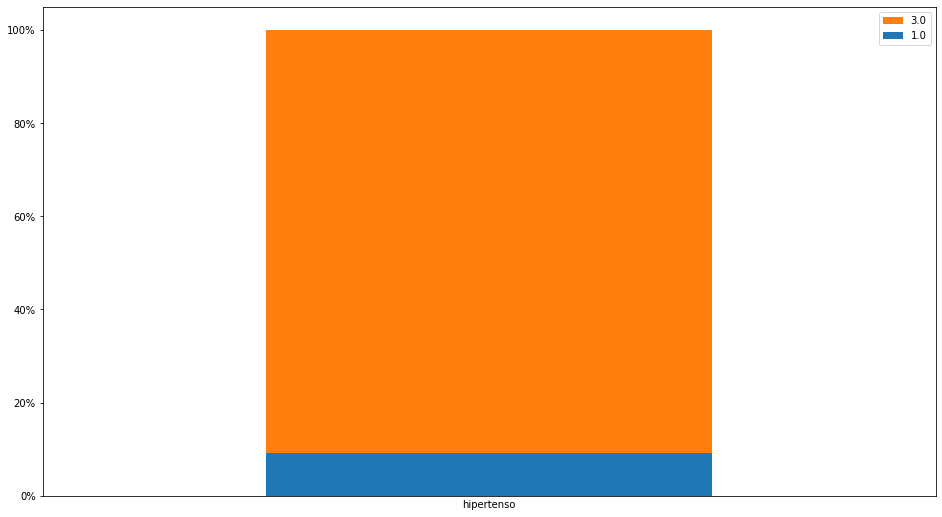

In [12]:
novos = database[database['C008'] <= 25]

novos['Q002'].value_counts()
# create dummy variable then group by that
# set the legend to false because we'll fix it later
novos.assign(dummy = 1).groupby(
  ['dummy','Q002']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel("hipertenso")

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(novos['Q002'].unique())

#plt.figure(figsize=(400,300))
plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#1.0 - diagnosticado com hipertensão, 3.0 - não diagnosticado com hipertensão

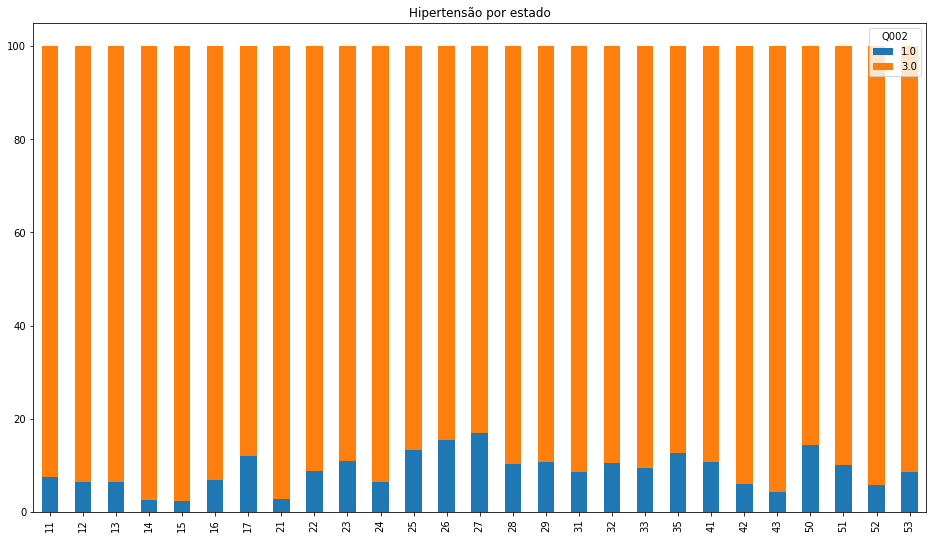

In [14]:
novos.groupby(['V0001','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por estado')
plt.xlabel("")
plt.show()

# 11-17 Norte
#21-29 Nordeste
#31-33 Sudeste
#41-43 Sul
#50-53 Centro-Oeste (e DF)

In [15]:
regiao = novos['V0001']

for i in range(novos.shape[0]):
    regiao.iloc[i] = regiao.iloc[i] // 10

novos['regiao'] = regiao

novos['regiao'].value_counts()

C:\Users\madof\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-15-a987fa93e71a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regiao.iloc[i] = regiao.iloc[i] // 10
<ipython-input-15-a987fa93e71a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novos['regiao'] = reg

2    734
1    628
3    488
5    326
4    245
Name: regiao, dtype: int64

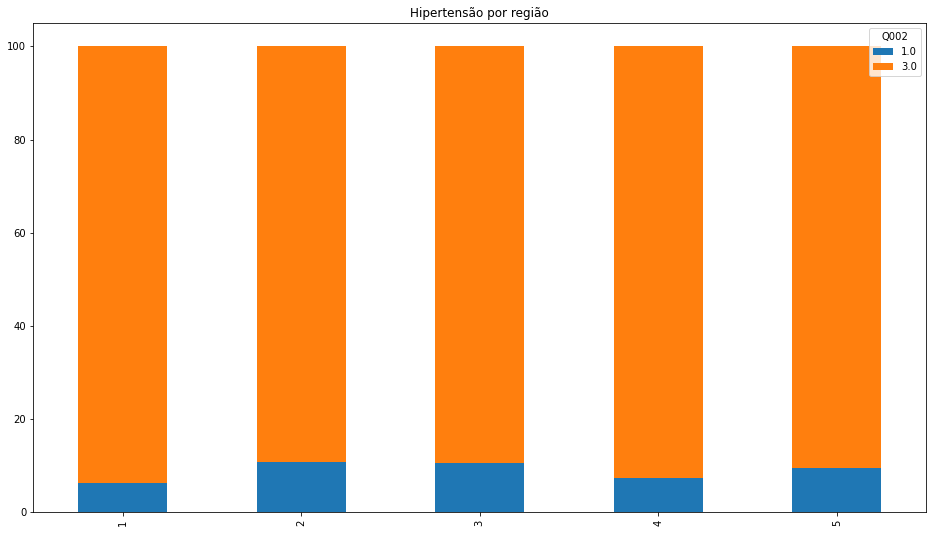

In [16]:
novos.groupby(['regiao','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por região')
plt.xlabel("")
plt.show()

# 11-17 Norte
#21-29 Nordeste
#31-33 Sudeste
#41-43 Sul
#50-53 Centro-Oeste (e DF)

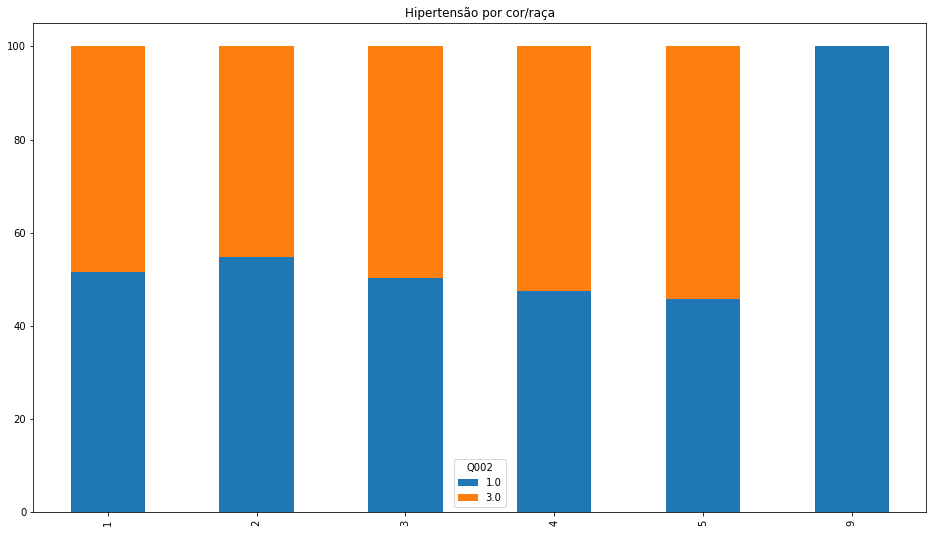

In [51]:
database.groupby(['C009','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por cor/raça')
plt.xlabel("")
plt.show()

# 1. Branca
# 2. Preta
# 3. Amarela
# 4. Parda e 5. Indígena -> juntar

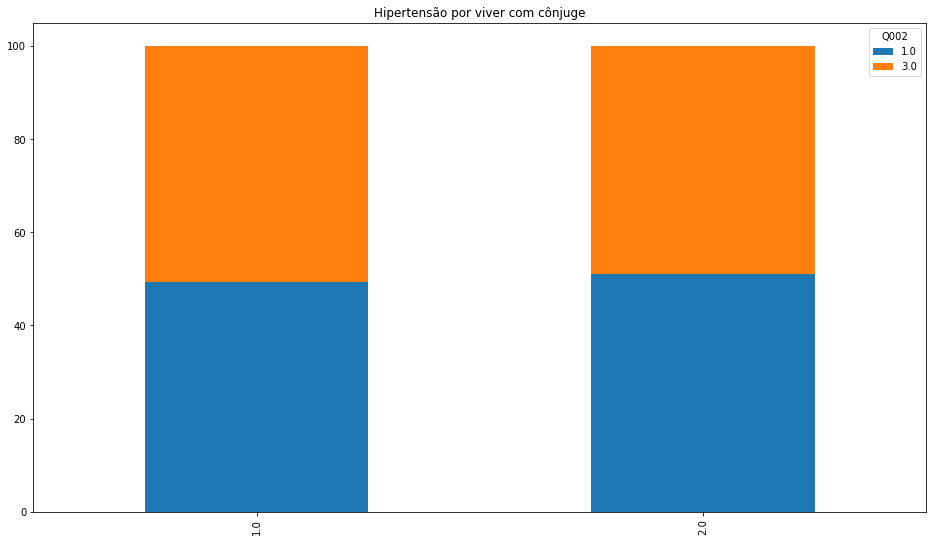

In [14]:
database.groupby(['C010','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por viver com cônjuge')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

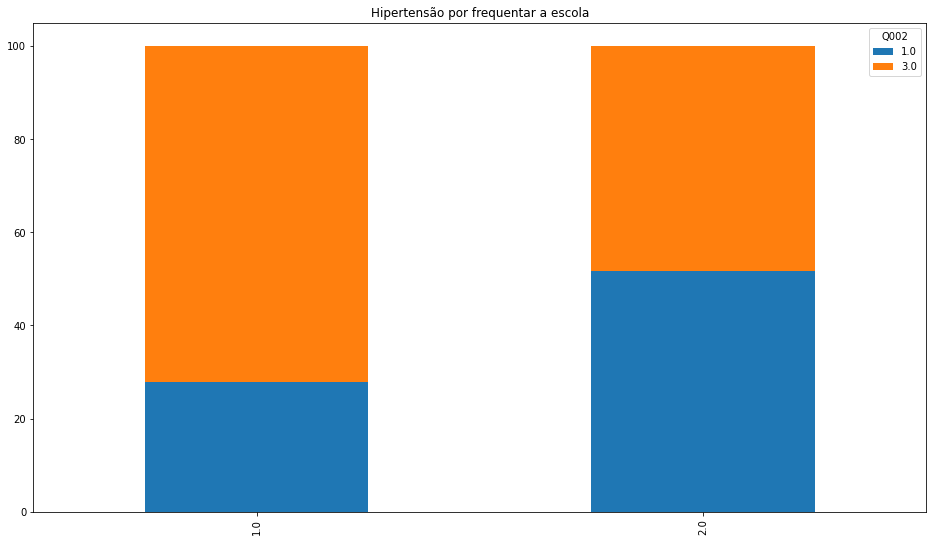

In [15]:
database.groupby(['D002','Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por frequentar a escola')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

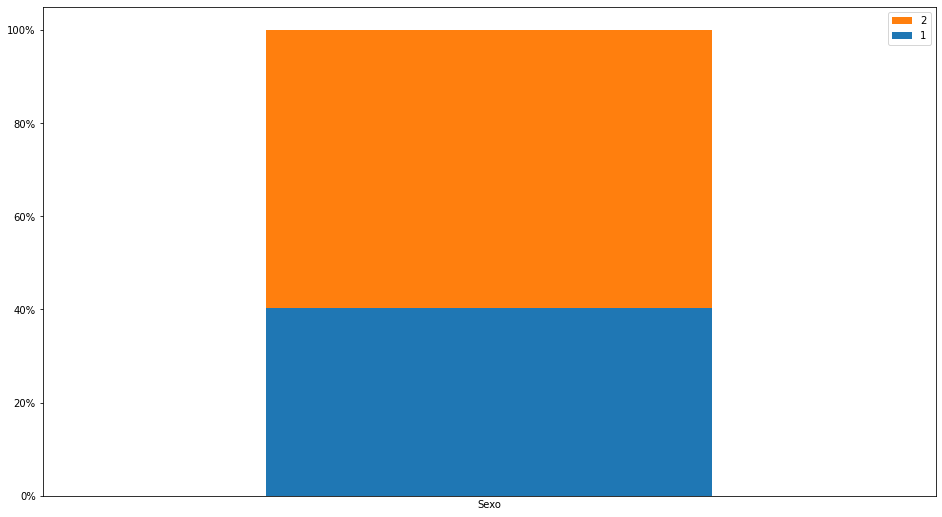

In [16]:
# create dummy variable then group by that
# set the legend to false because we'll fix it later
database.assign(dummy = 1).groupby(
  ['dummy','C006']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel("Sexo")

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = database['C006'].unique()

#plt.figure(figsize=(400,300))
plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#1.0 - diagnosticado com hipertensão, 3.0 - não diagnosticado com hipertensão

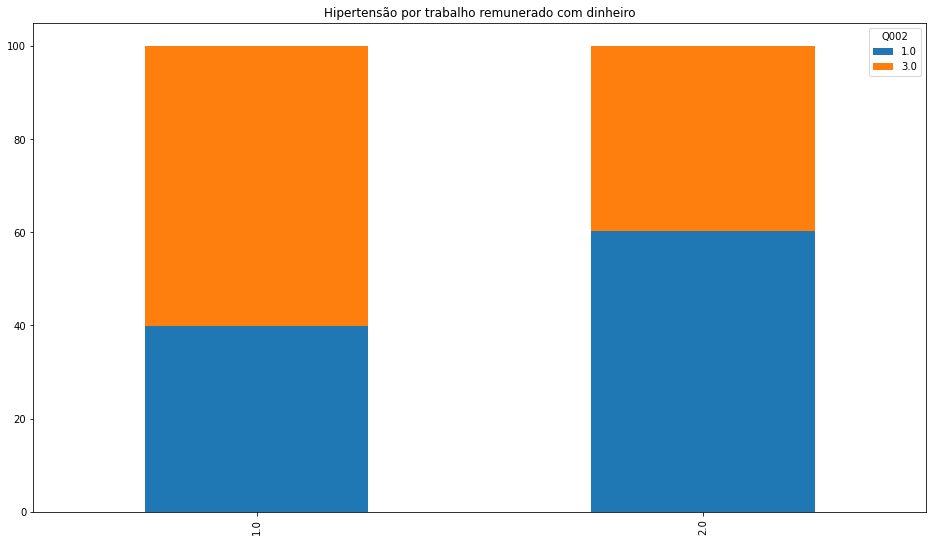

In [17]:
database.groupby(['E001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por trabalho remunerado com dinheiro')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

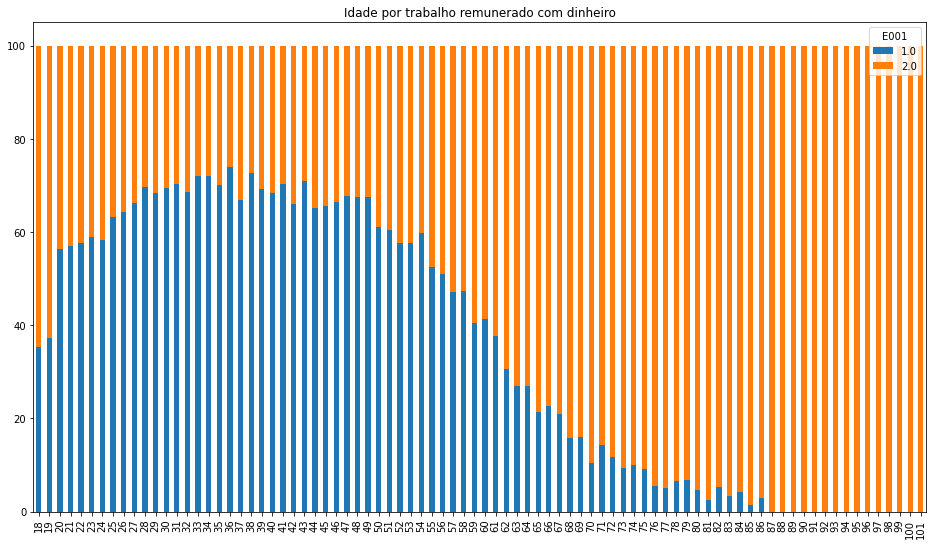

In [18]:
database.groupby(['C008', 'E001']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Idade por trabalho remunerado com dinheiro')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

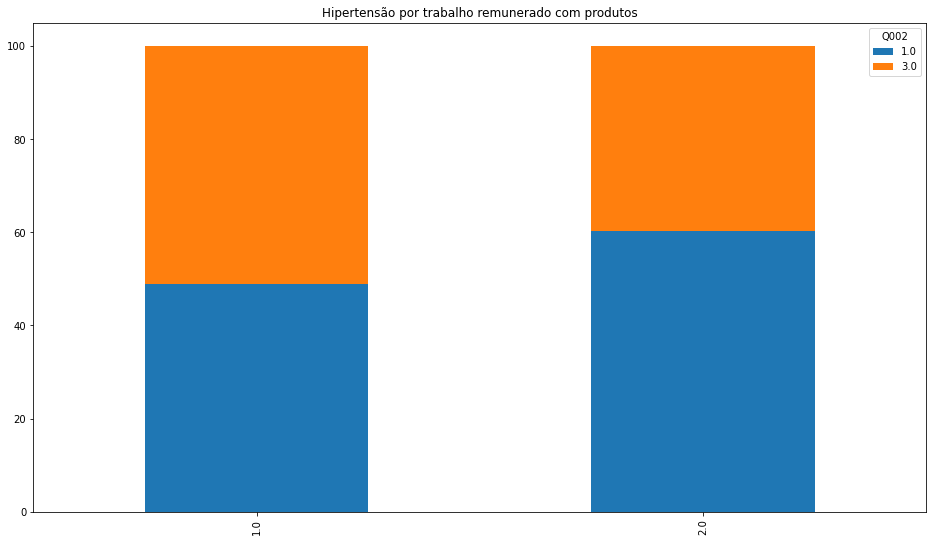

In [19]:
database.groupby(['E002', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por trabalho remunerado com produtos')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

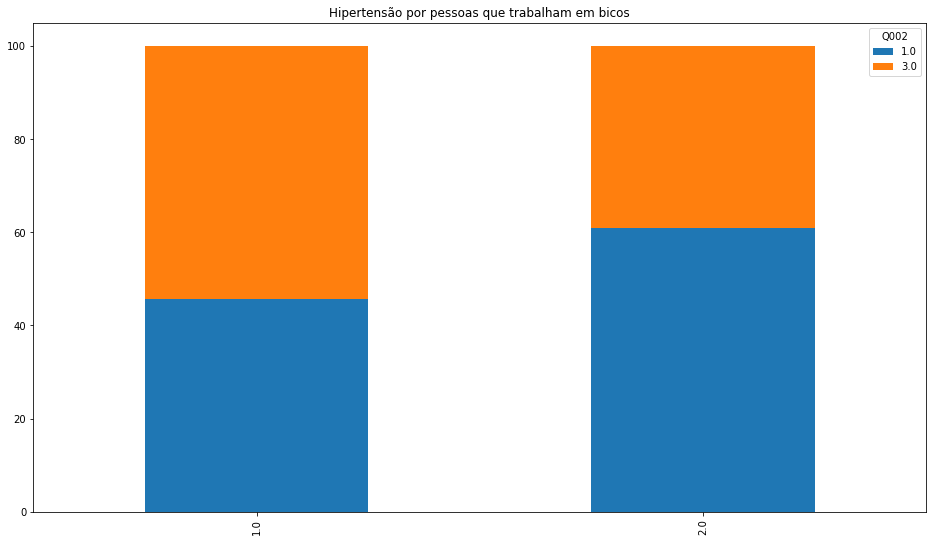

In [20]:
database.groupby(['E003', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por pessoas que trabalham em bicos')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

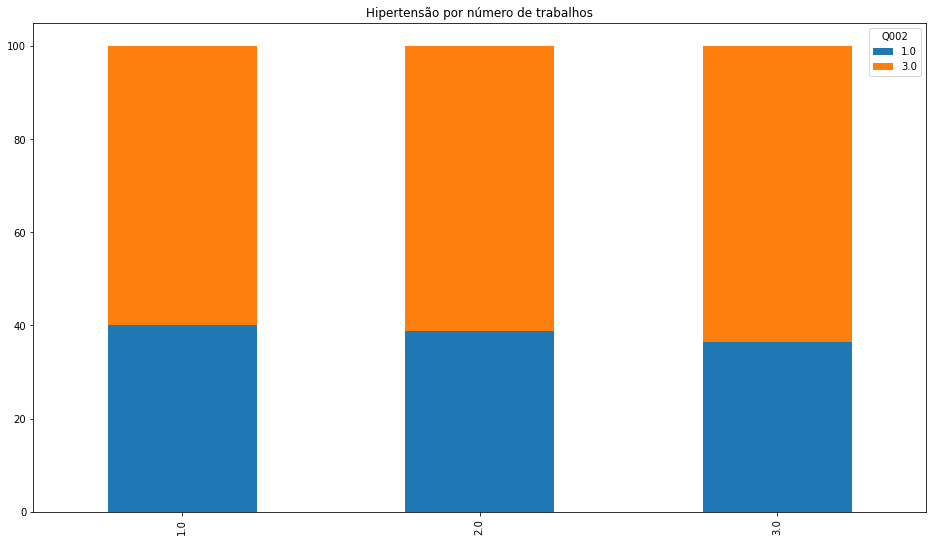

In [21]:
database.groupby(['E011', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por número de trabalhos')
plt.xlabel("")
plt.show()

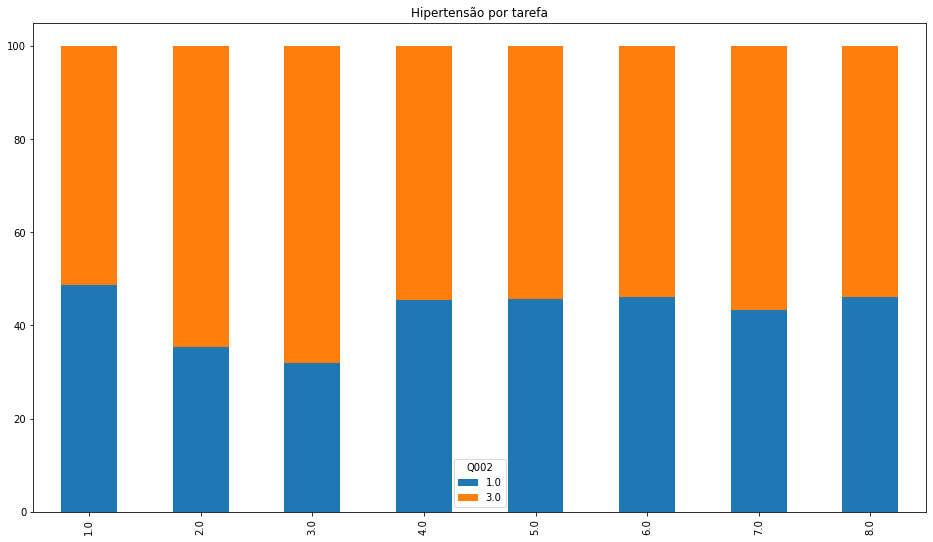

In [22]:
database.groupby(['E014', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.title('Hipertensão por tarefa')
plt.xlabel("")
plt.show()

# 1. Trabalhador doméstico
# 2. Militar do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros militar
# 3. Empregado do setor privado
# 4. Empregado do setor público (inclusive empresas de economia mista)
# 5. Empregador
# 6. Conta própria
# 7. Trabalhador não remunerado em ajuda a conta própria ou empregador que era membro do domicílio
# 8. Trabalhador não remunerado em ajuda a empregado que era membro do domicílio

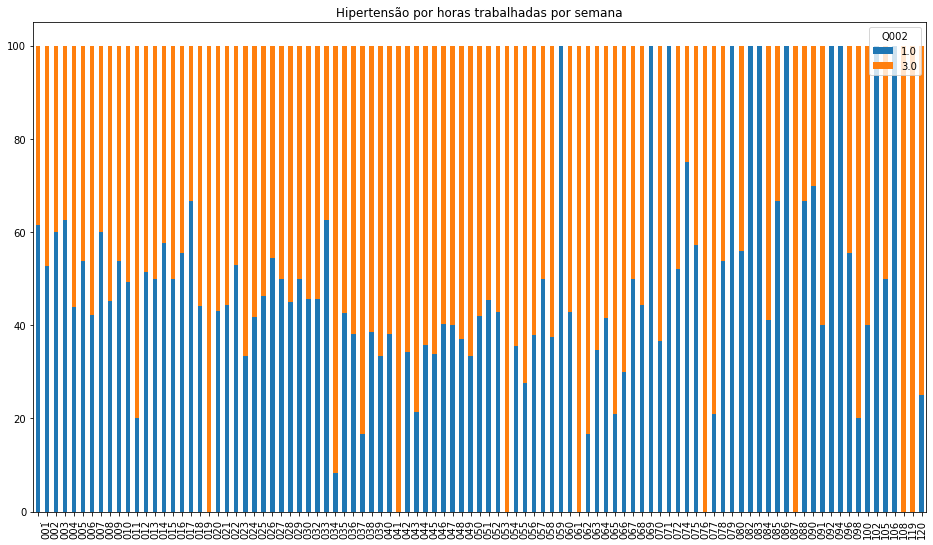

In [23]:
database.groupby(['E017', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por horas trabalhadas por semana')
plt.xlabel("")
plt.show()

# 1. Trabalhador doméstico
# 2. Militar do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros militar
# 3. Empregado do setor privado
# 4. Empregado do setor público (inclusive empresas de economia mista)
# 5. Empregador
# 6. Conta própria
# 7. Trabalhador não remunerado em ajuda a conta própria ou empregador que era membro do domicílio
# 8. Trabalhador não remunerado em ajuda a empregado que era membro do domicílio

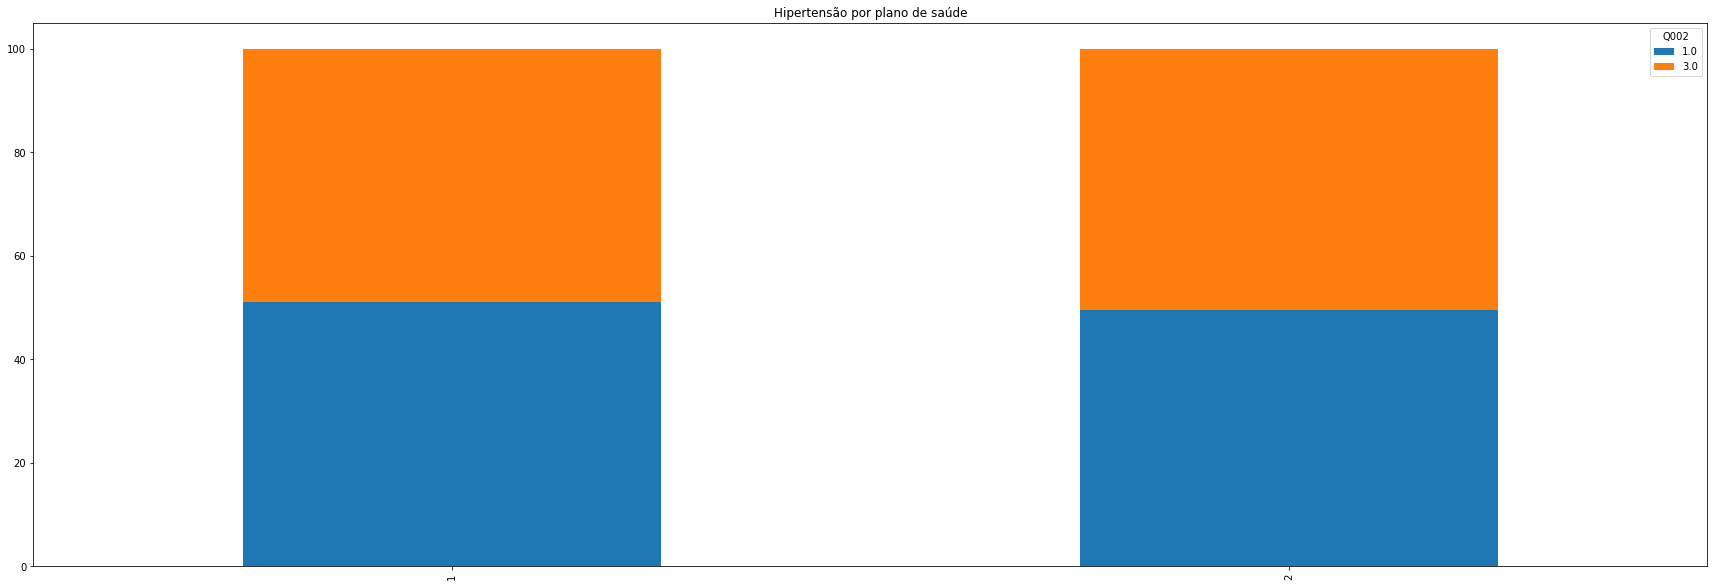

In [24]:
database.groupby(['I001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por plano de saúde')
plt.xlabel("")
plt.show()

# 1. Tem plano de saúde
# 2. Não tem plano de saúde

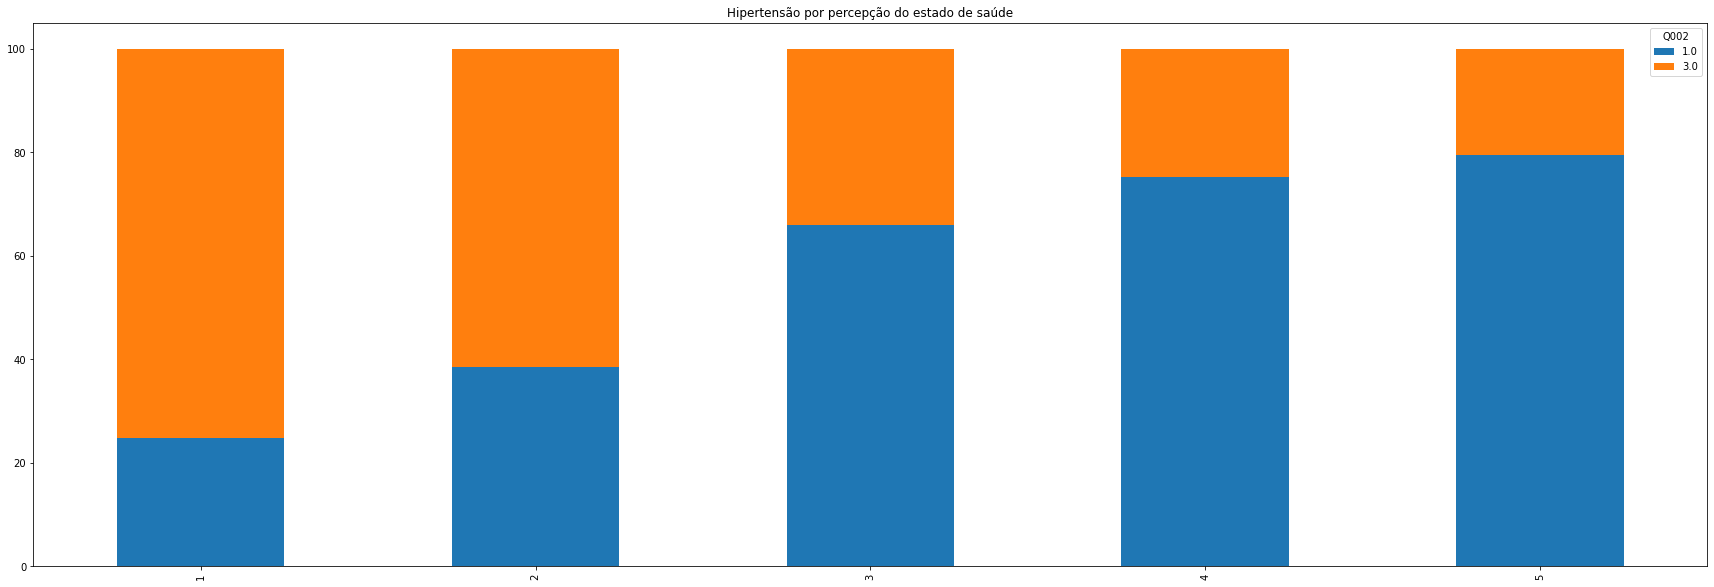

In [25]:
database.groupby(['J001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por percepção do estado de saúde')
plt.xlabel("")
plt.show()

# 1. Muito bom
# 2. Bom
# 3. Regular
# 4. Ruim
# 5. Muito ruim

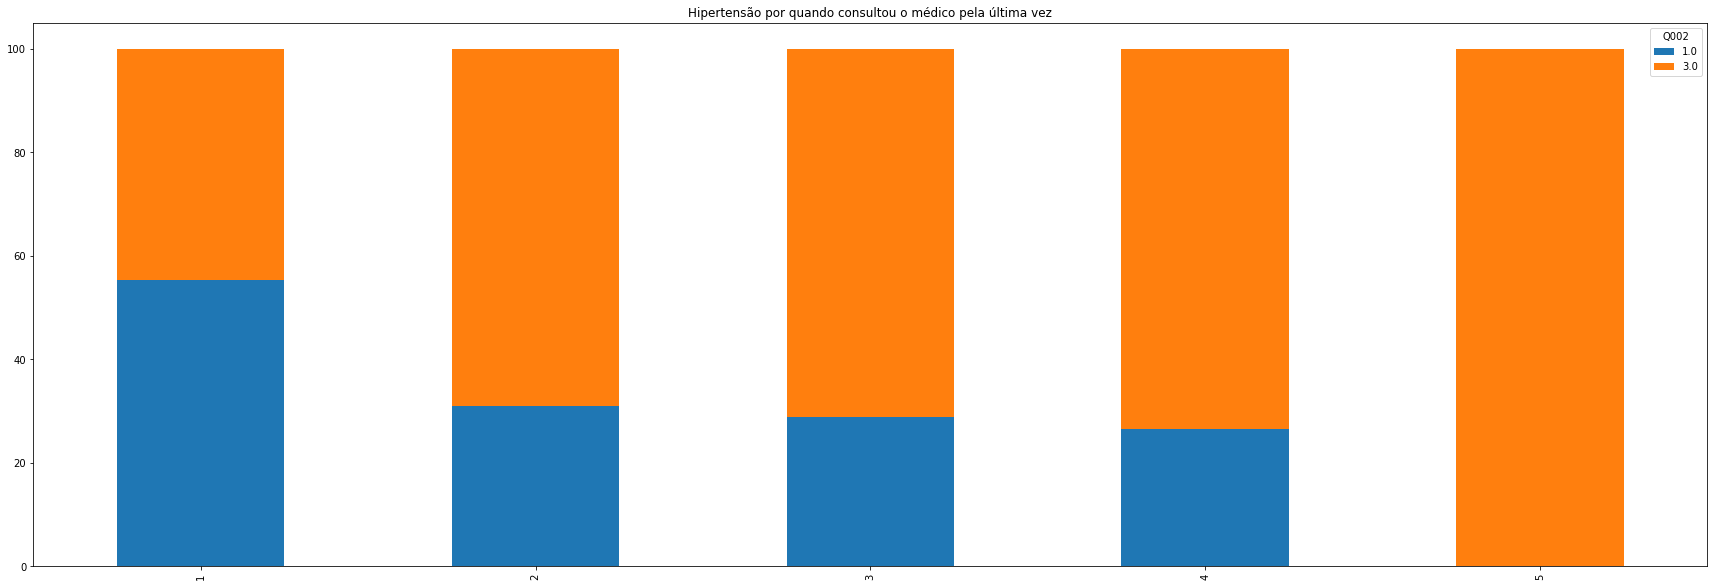

In [26]:
database.groupby(['J011', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por quando consultou o médico pela última vez')
plt.xlabel("")
plt.show()

# 1. Nos doze últimos meses
# 2. De 1 ano a menos de 2 anos
# 3. De 2 anos a menos de 3 anos
# 4. 3 anos ou mais
# 5. Nunca foi ao médico

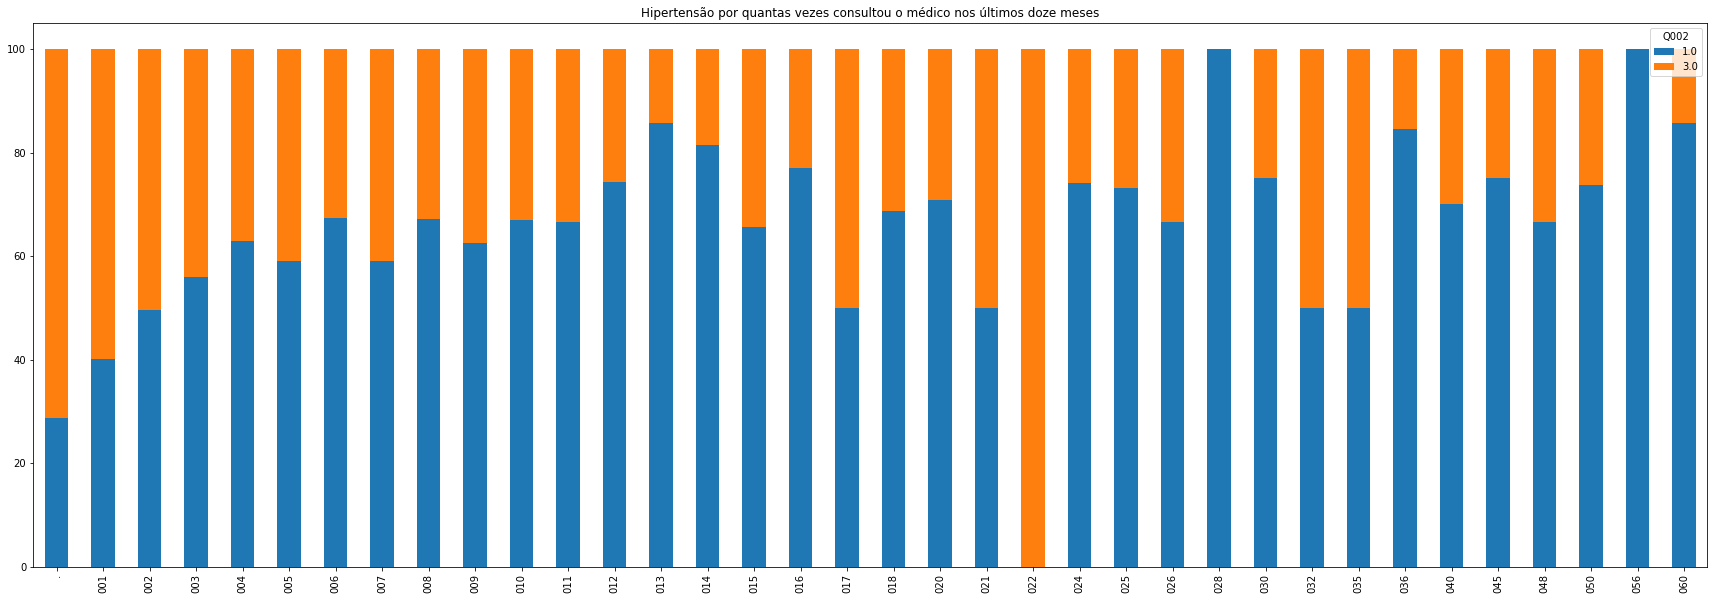

In [27]:
database.groupby(['J012', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por quantas vezes consultou o médico nos últimos doze meses')
plt.xlabel("")
plt.show()

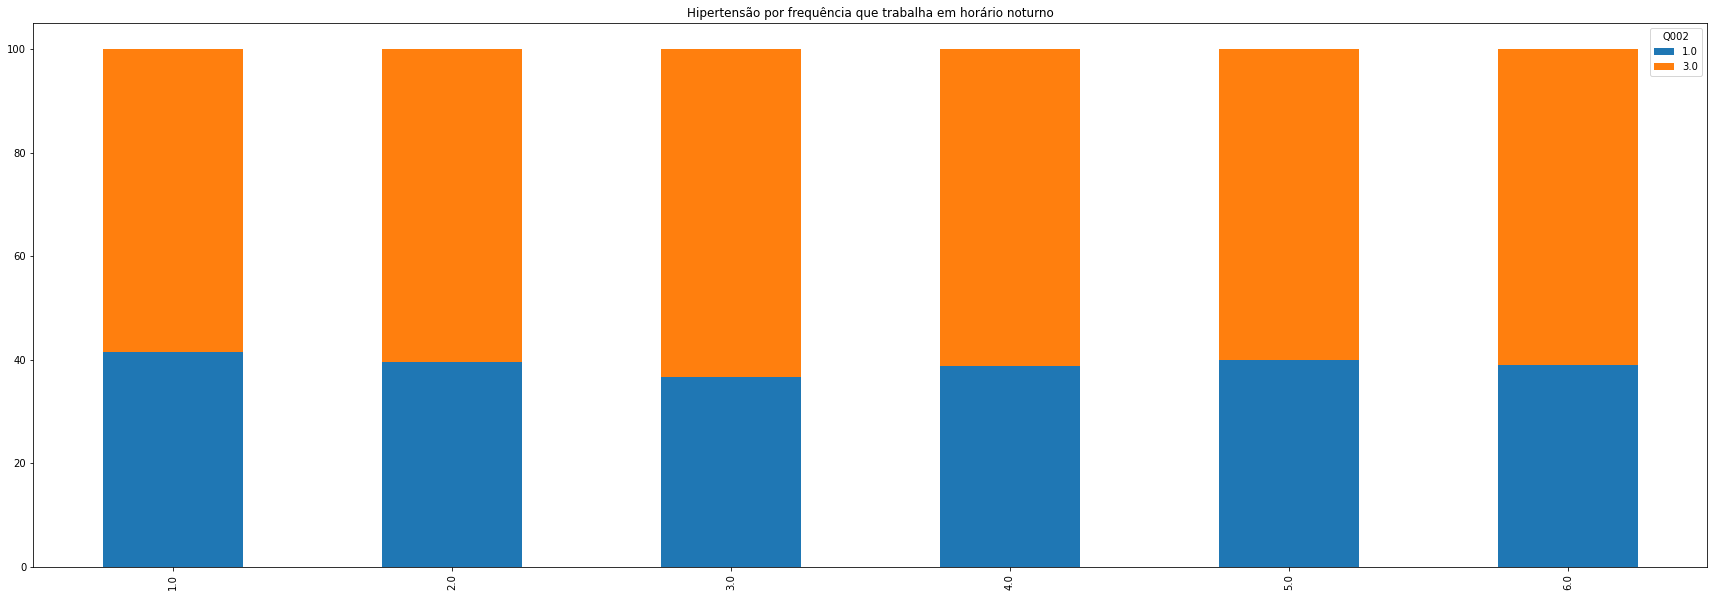

In [28]:
database.groupby(['M006', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por frequência que trabalha em horário noturno')
plt.xlabel("")
plt.show()

# 1. Menos de 1 vez por mês
# 2. De 1 a 3 vezes por mês
# 3. 1 vez por semana
# 4. 2 a 3 vezes por semana
# 5. 4 vezes por semana
# 6. 5 vezes ou mais por semana

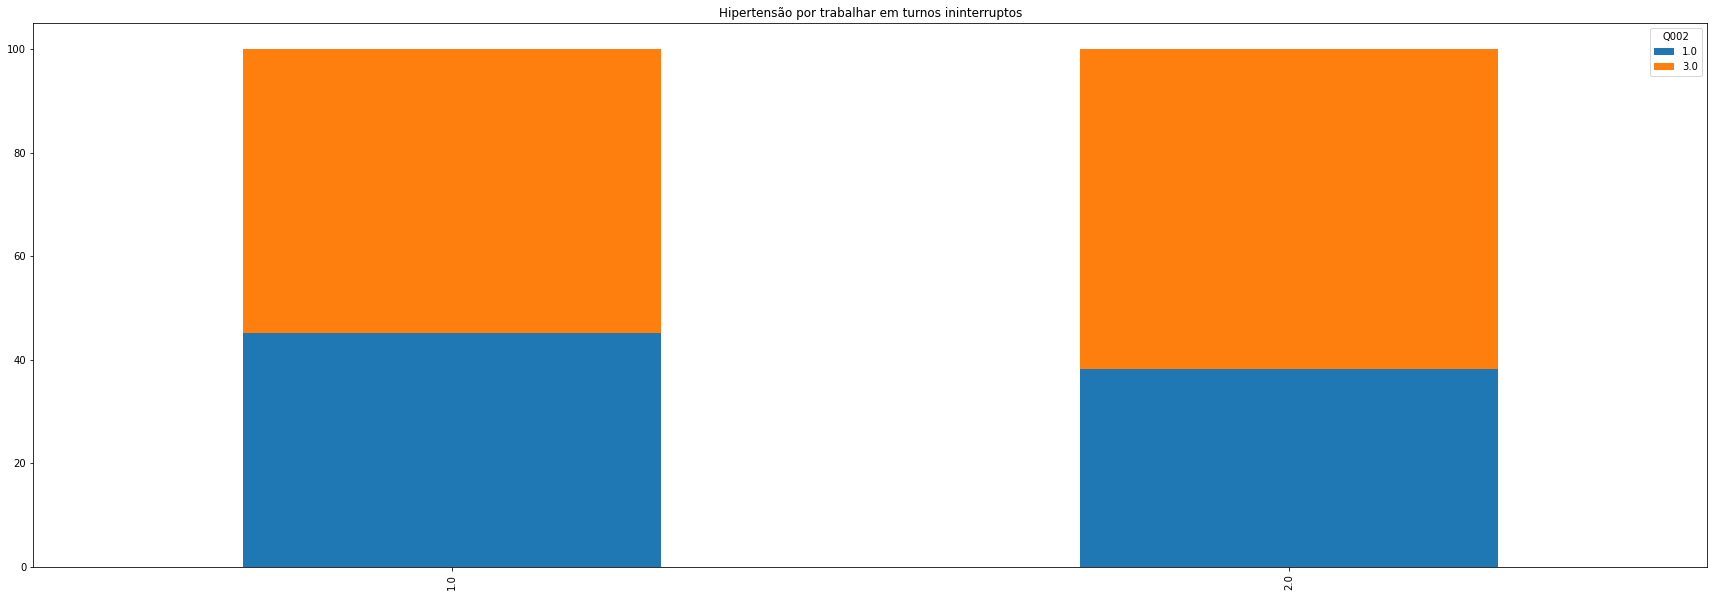

In [29]:
database.groupby(['M007', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por trabalhar em turnos ininterruptos')
plt.xlabel("")
plt.show()

# 1. Trabalha em turnos ininterruptos
# 2. Não trabalha em turnos ininterruptos

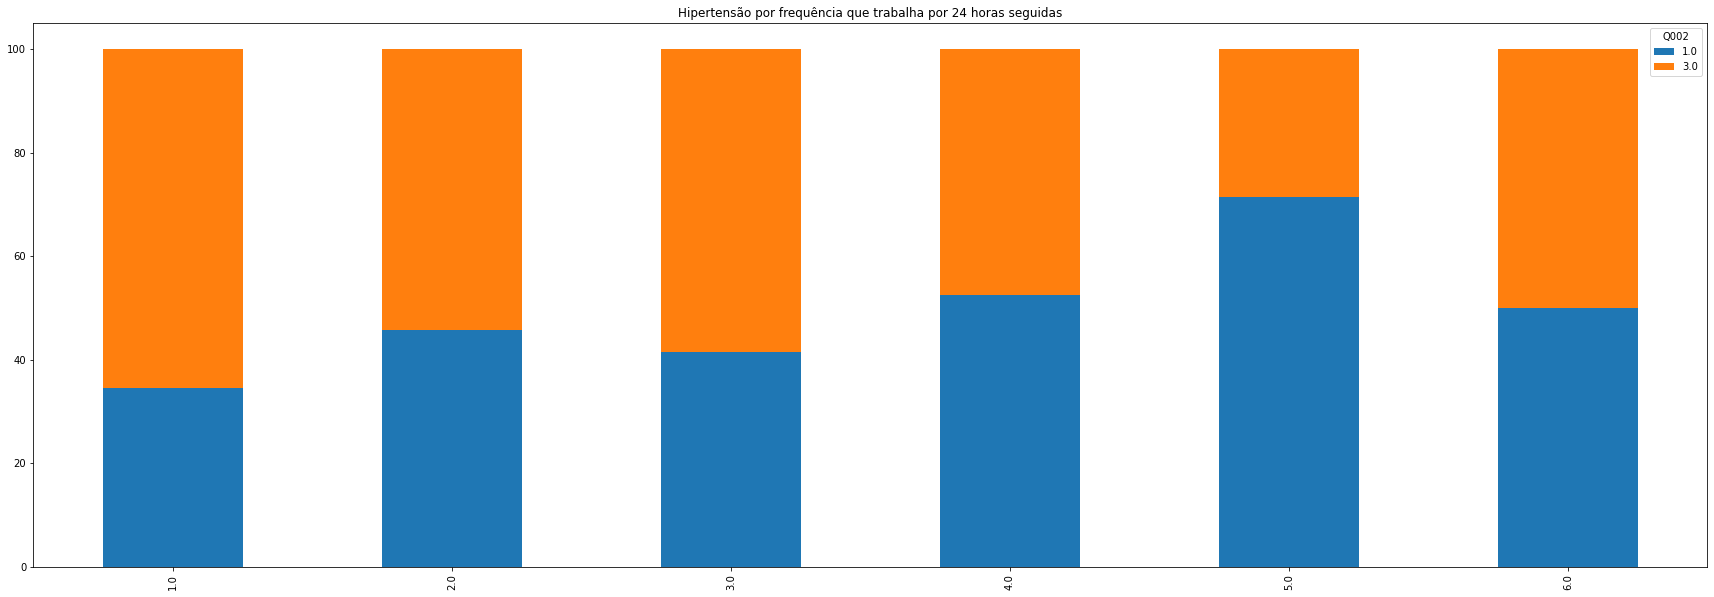

In [30]:
database.groupby(['M008', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por frequência que trabalha por 24 horas seguidas')
plt.xlabel("")
plt.show()

# 1. Menos de 1 vez por mês
# 2. De 1 a 3 vezes por mês
# 3. 1 vez por semana
# 4. 2 a 3 vezes por semana
# 5. 4 vezes por semana
# 6. 5 vezes ou mais por semana

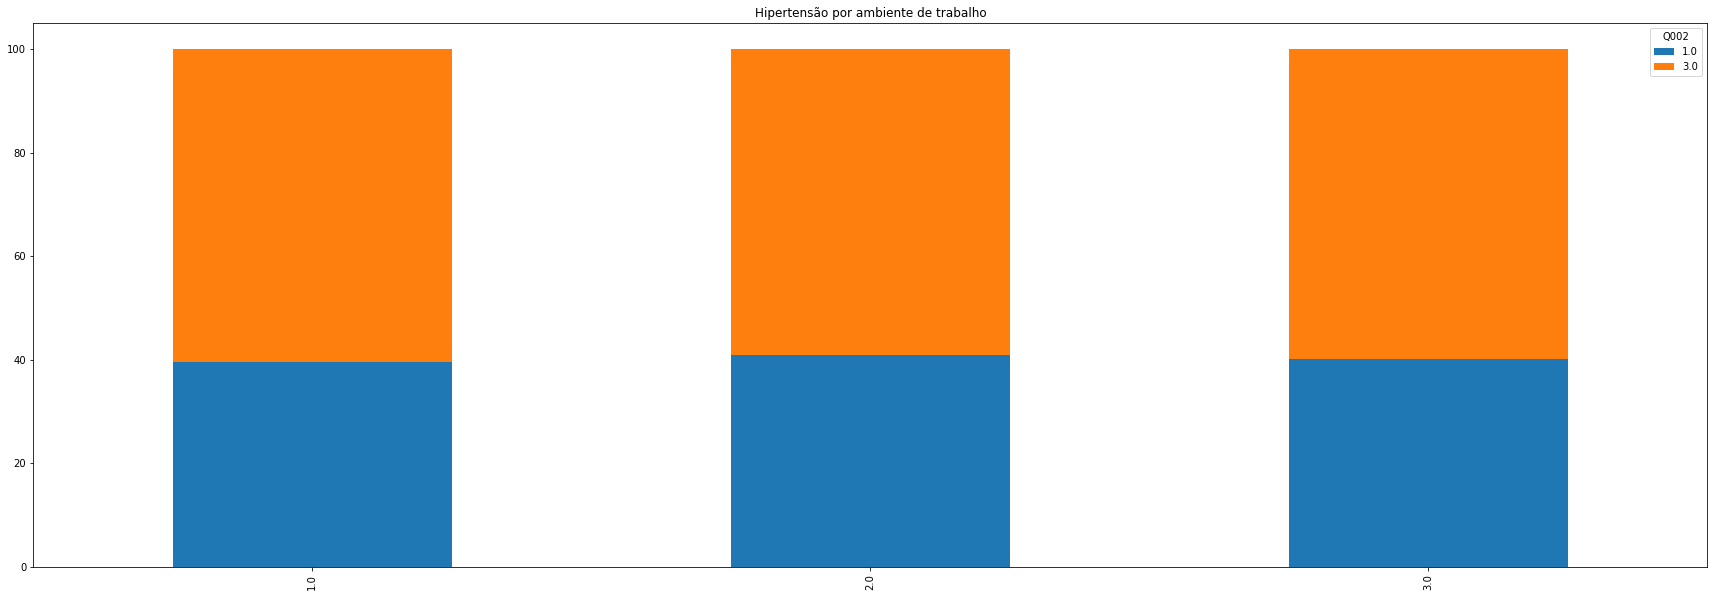

In [31]:
database.groupby(['M009', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por ambiente de trabalho')
plt.xlabel("")
plt.show()

# 1. Fechado
# 2. Aberto
# 3. Ambos

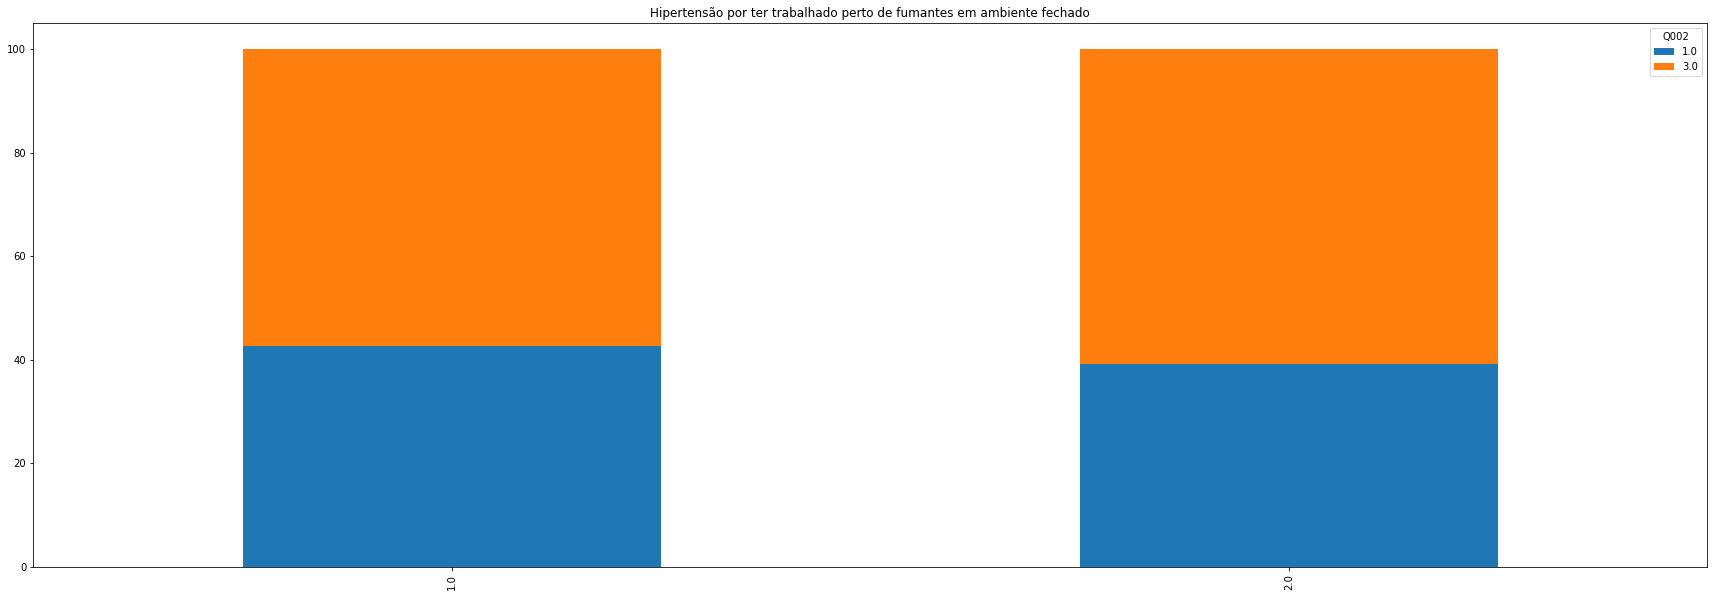

In [32]:
database.groupby(['M010', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por ter trabalhado perto de fumantes em ambiente fechado')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

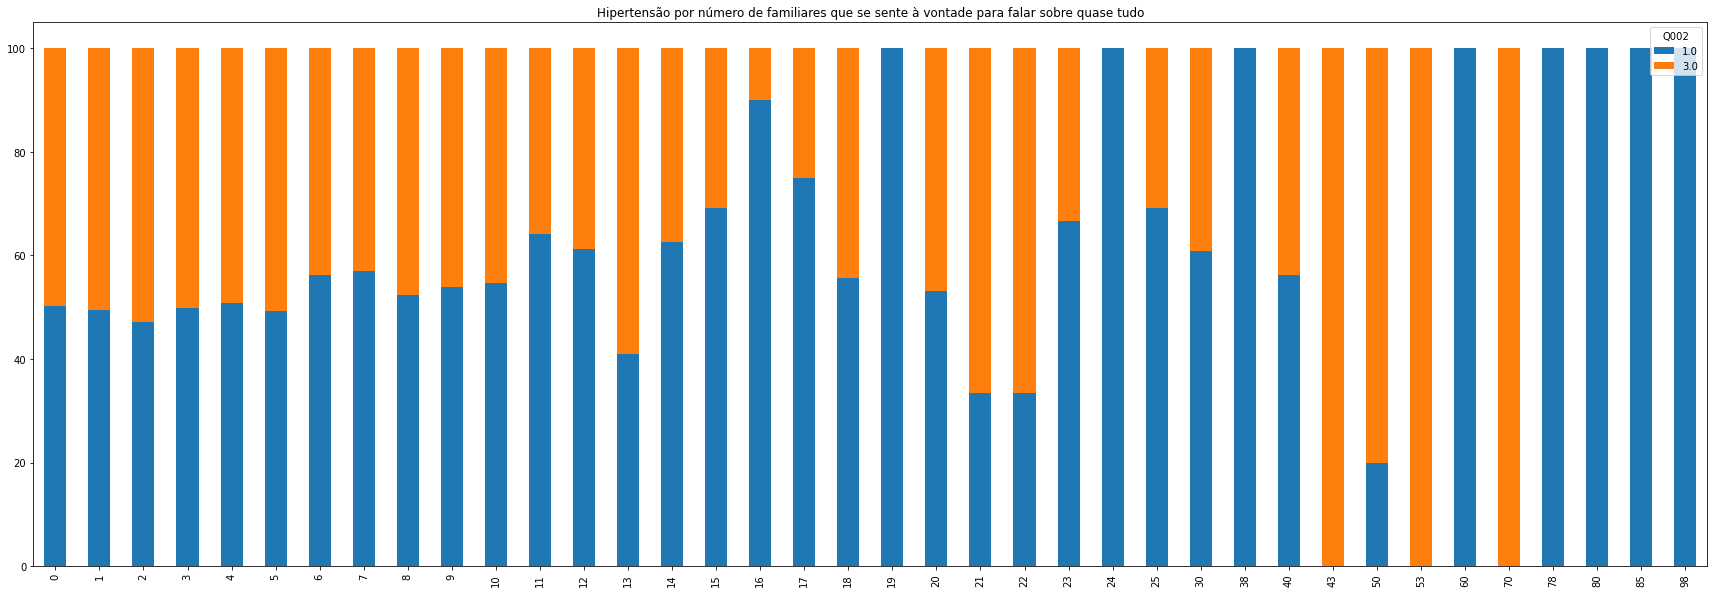

In [33]:
database.groupby(['M014', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por número de familiares que se sente à vontade para falar sobre quase tudo')
plt.xlabel("")
plt.show()

### 

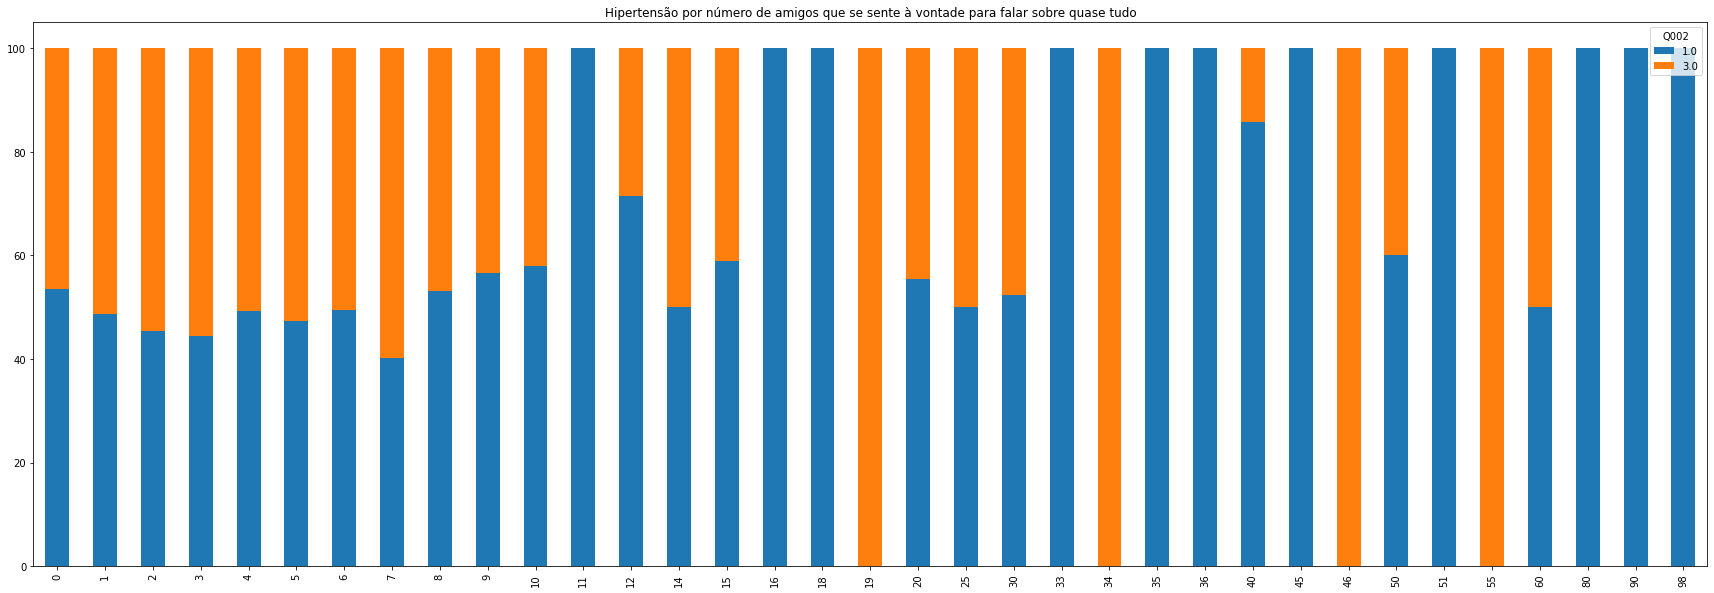

In [34]:
database.groupby(['M015', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por número de amigos que se sente à vontade para falar sobre quase tudo')
plt.xlabel("")
plt.show()

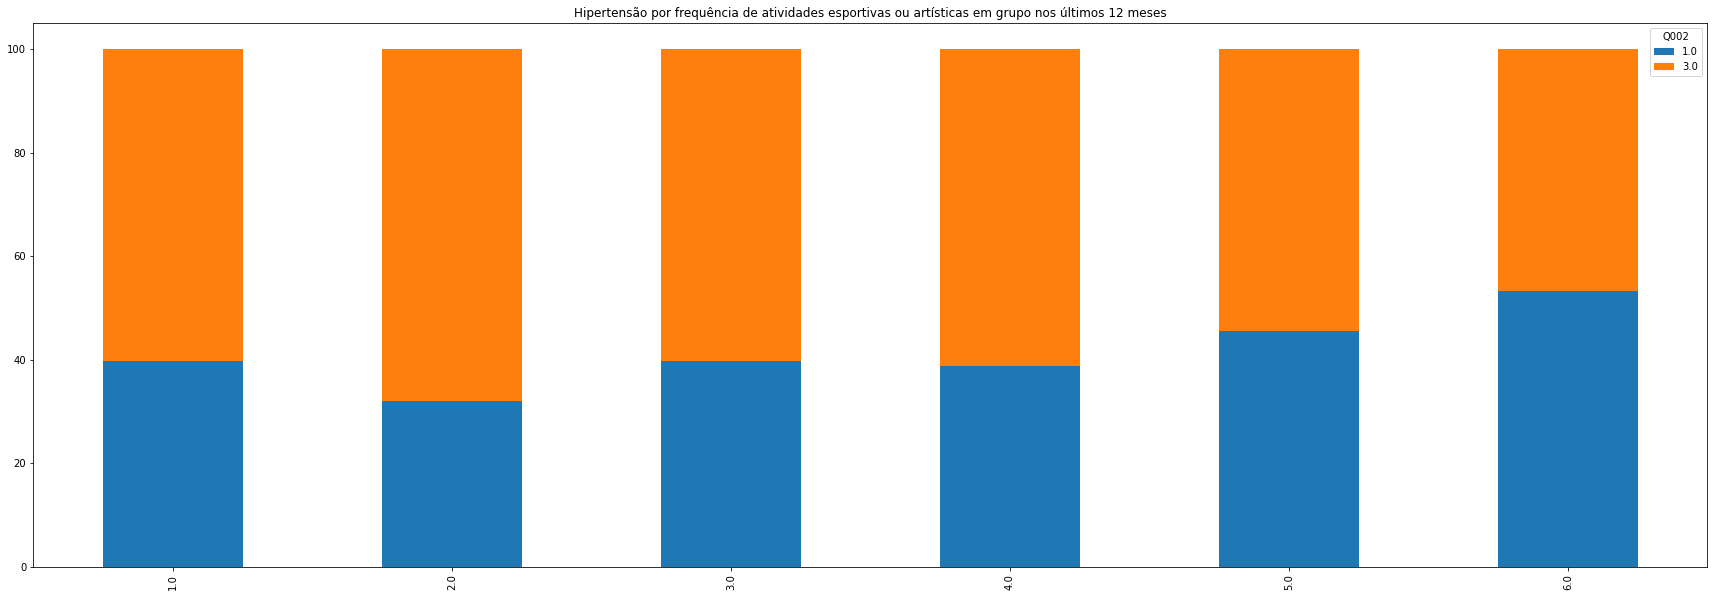

In [35]:
database.groupby(['M016', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por frequência de atividades esportivas ou artísticas em grupo nos últimos 12 meses')
plt.xlabel("")
plt.show()

# 1. Mais de uma vez por semana 
# 2. Uma vez por semana 
# 3. De 2 a 3 vezes por mês
# 4. Algumas vezes no ano
# 5. Uma vez no ano
# 6. Nenhuma vez

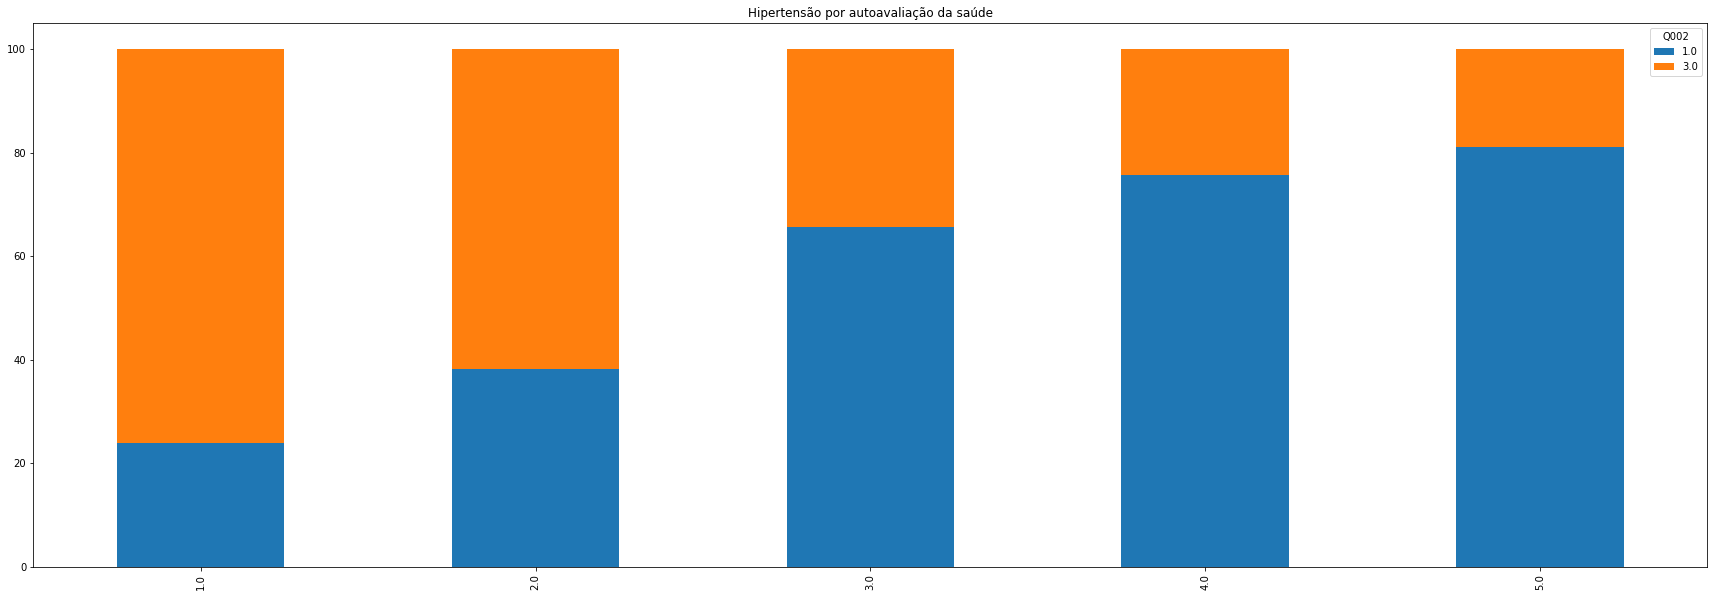

In [36]:
database.groupby(['N001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por autoavaliação da saúde')
plt.xlabel("")
plt.show()

# 1. Muito boa
# 2. Boa
# 3. Regular
# 4. Ruim
# 5. Muito ruim

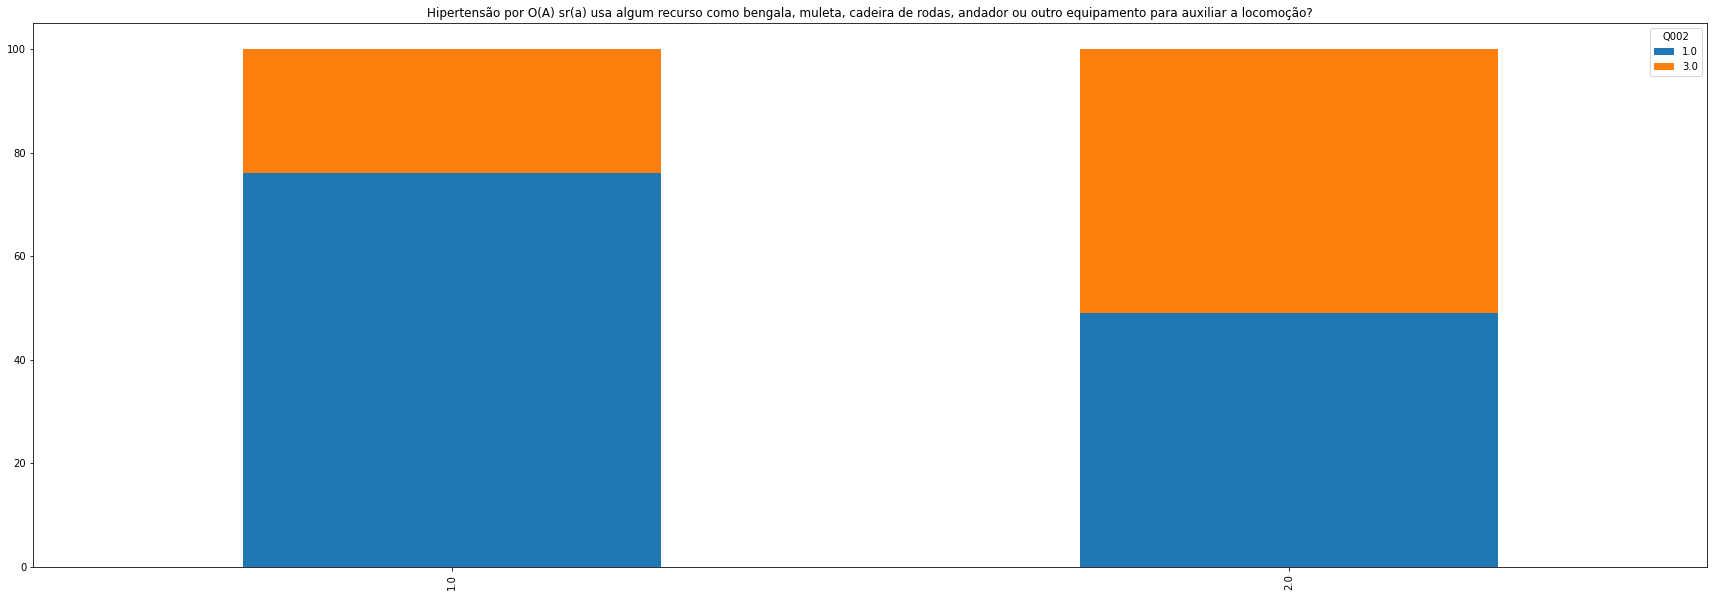

In [37]:
database.groupby(['N002', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por O(A) sr(a) usa algum recurso como bengala, muleta, cadeira de rodas, andador ou outro equipamento para auxiliar a locomoção?')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

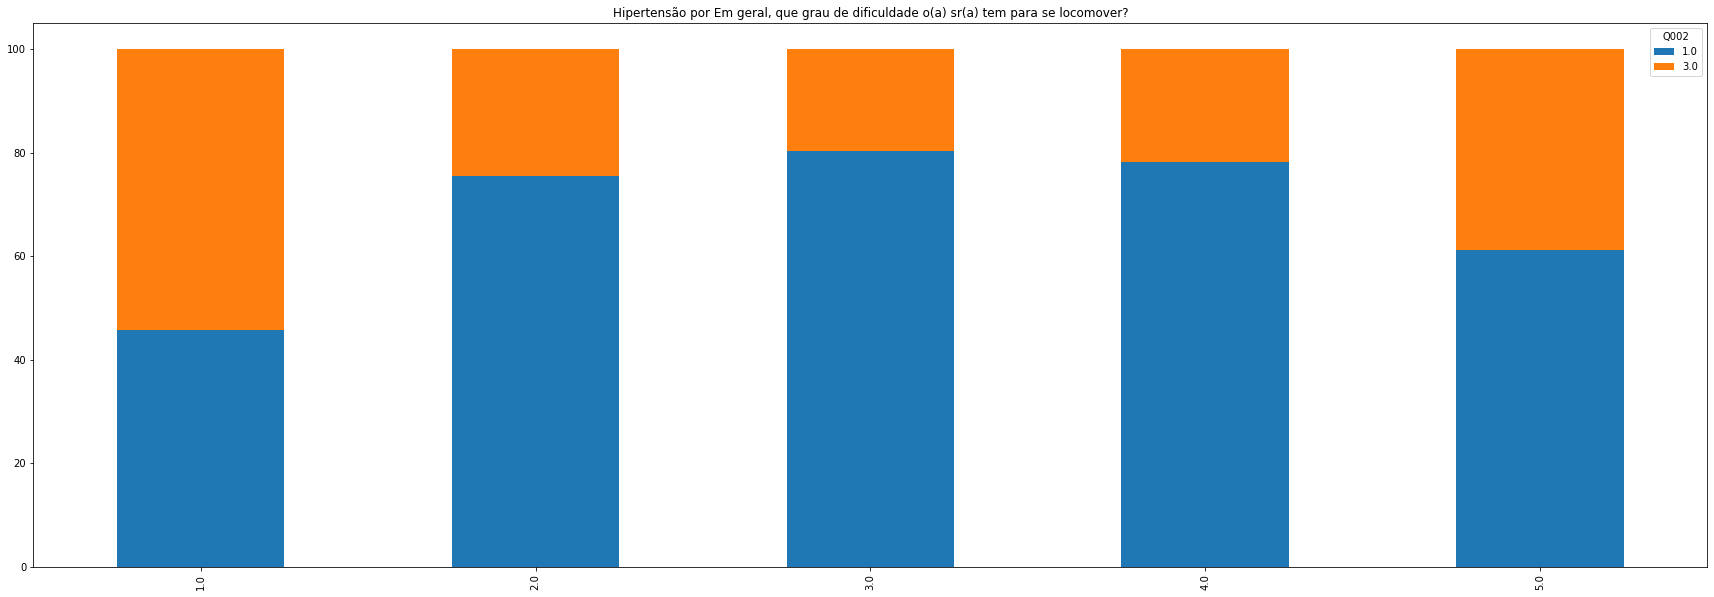

In [38]:
database.groupby(['N003', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Em geral, que grau de dificuldade o(a) sr(a) tem para se locomover?')
plt.xlabel("")
plt.show()

#1. Nenhum
#2. Leve
#3. Médio
#4. Intenso
#5. Não consegue

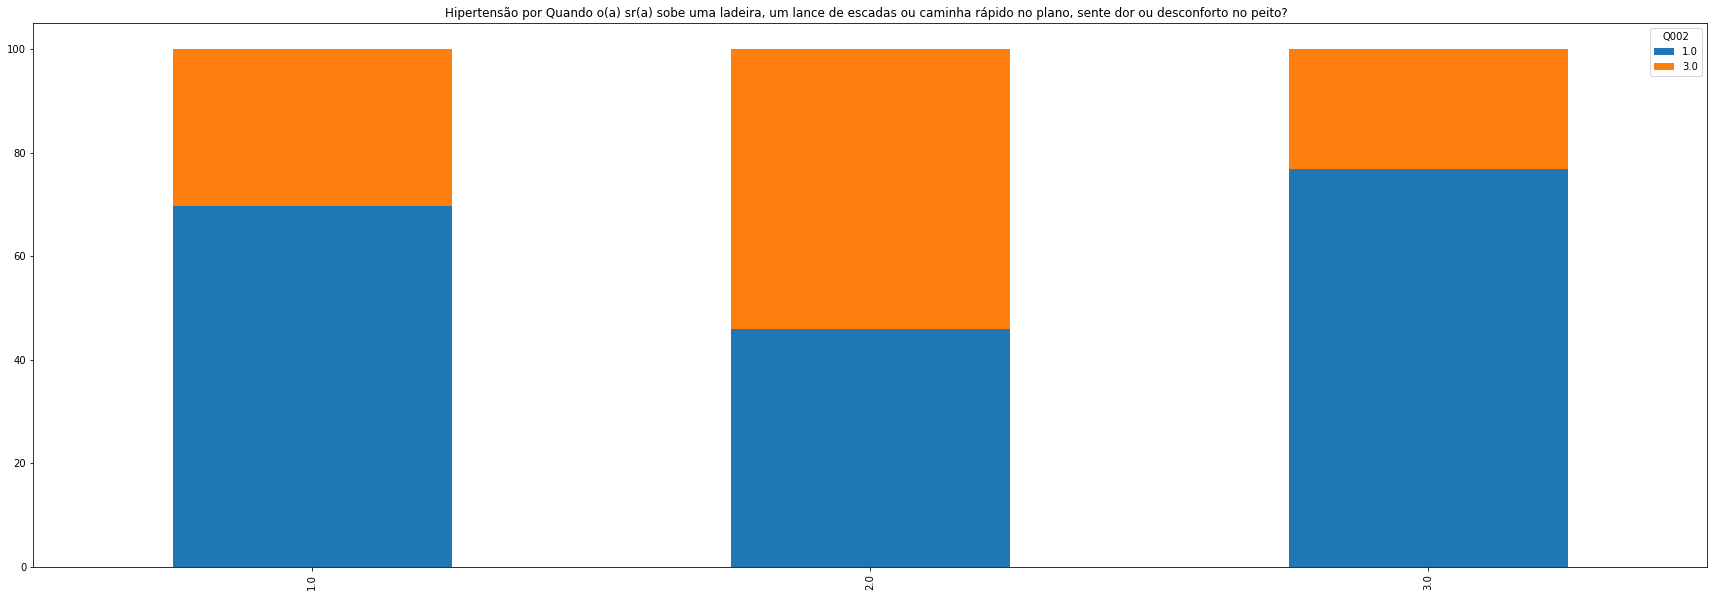

In [39]:
database.groupby(['N004', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Quando o(a) sr(a) sobe uma ladeira, um lance de escadas ou caminha rápido no plano, sente dor ou desconforto no peito?  ')
plt.xlabel("")
plt.show()

#1. Sim
#2. Não
#3. Não se aplica

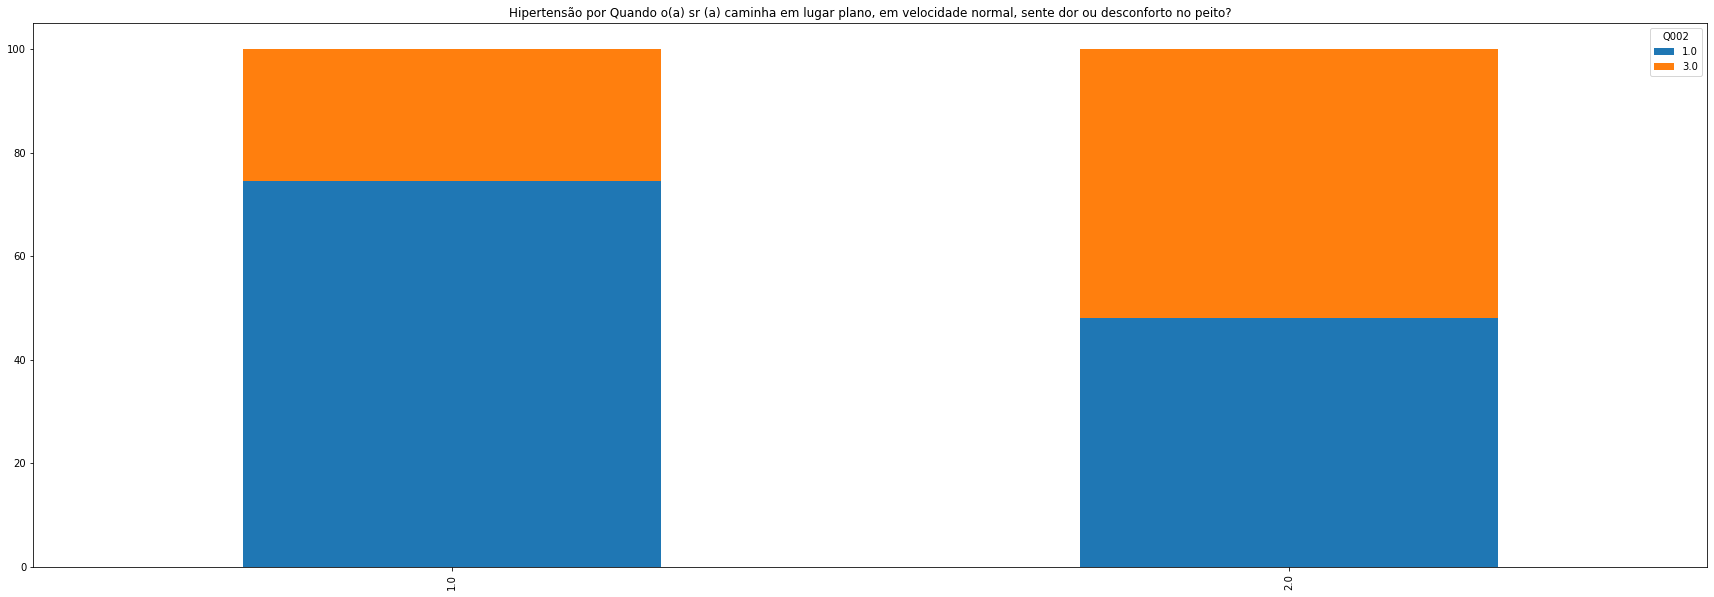

In [40]:
database.groupby(['N005', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Quando o(a) sr (a) caminha em lugar plano, em velocidade normal, sente dor ou desconforto no peito?')
plt.xlabel("")
plt.show()

#1. Sim
#2. Não

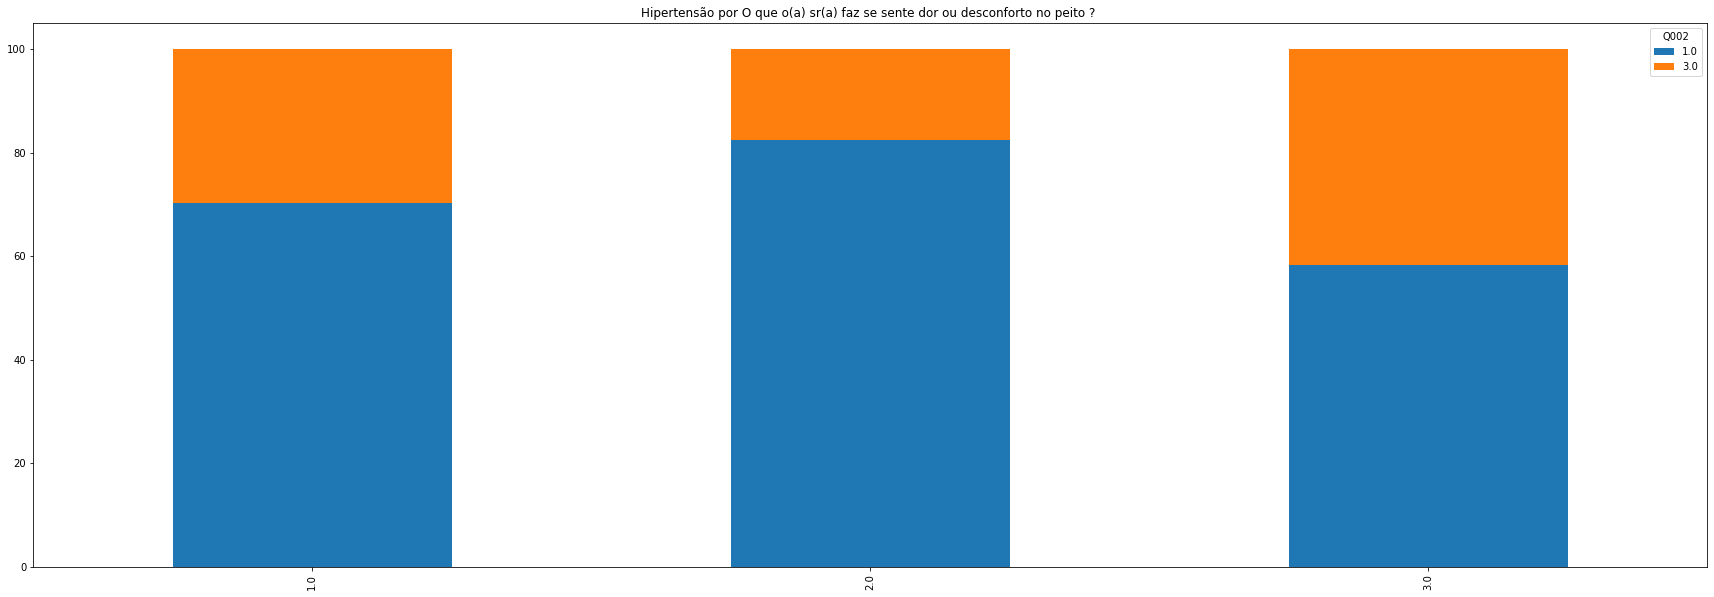

In [41]:
database.groupby(['N006', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por O que o(a) sr(a) faz se sente dor ou desconforto no peito ? ')
plt.xlabel("")
plt.show()

#1. Para ou diminui a velocidade
#2. Continua após tomar um remédio que dissolve na boca para aliviar a dor
#3. Continua caminhado

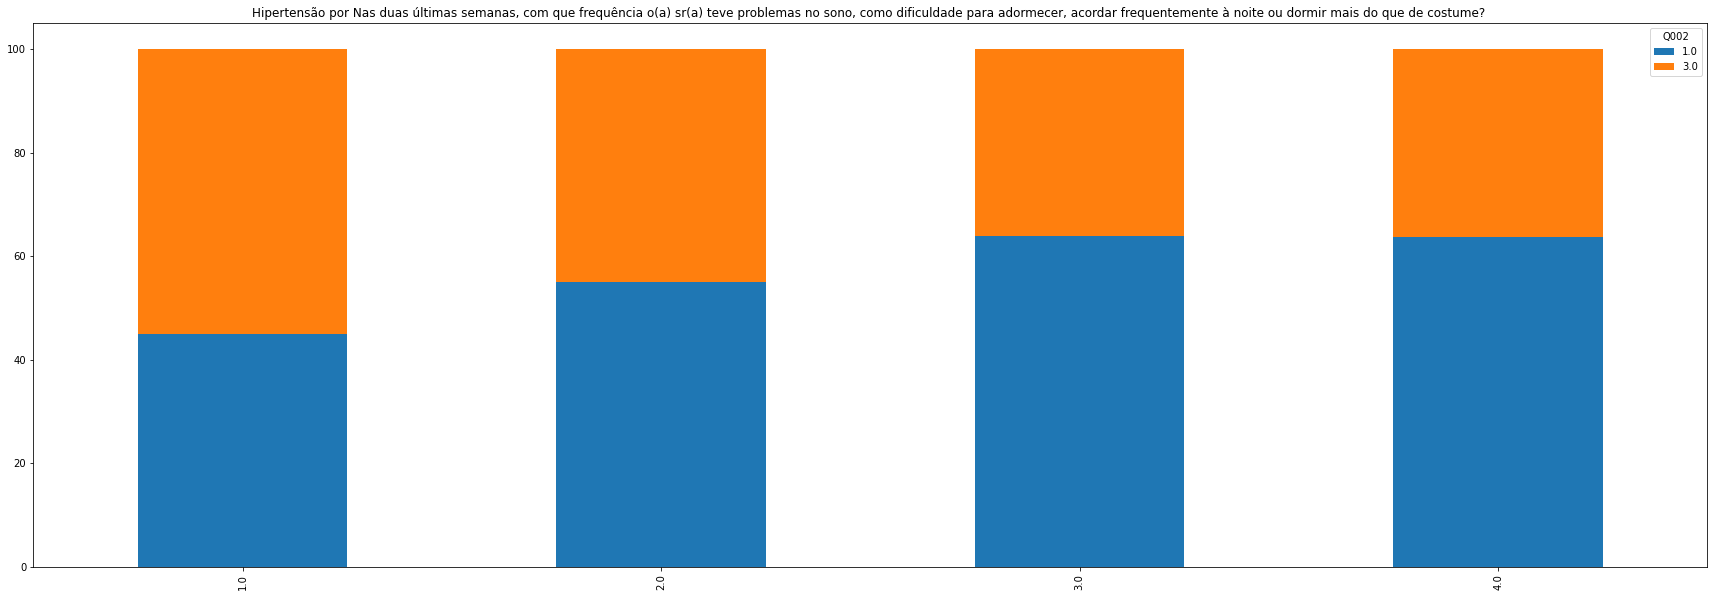

In [42]:
database.groupby(['N010', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas no sono, como dificuldade para adormecer, acordar frequentemente à noite ou dormir mais do que de costume? ')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

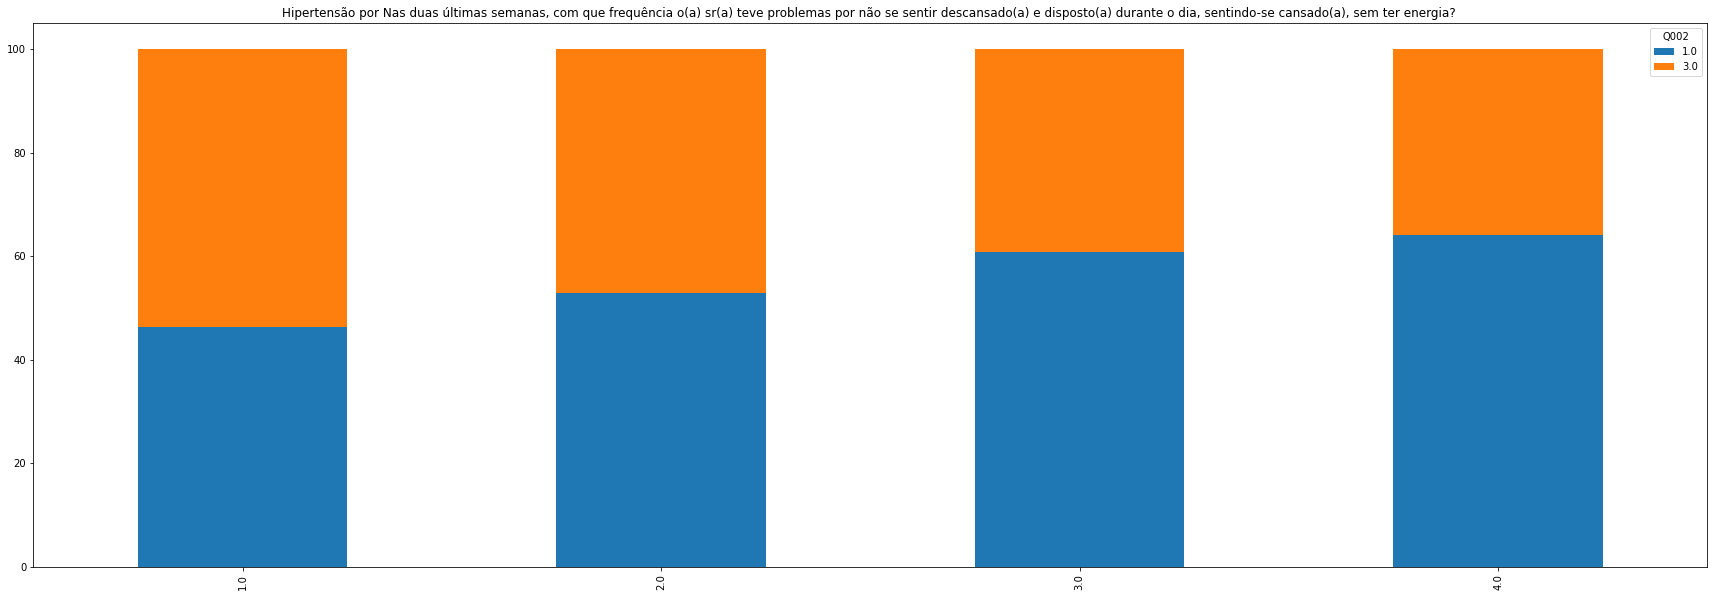

In [43]:
database.groupby(['N011', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas por não se sentir descansado(a) e disposto(a) durante o dia, sentindo-se cansado(a), sem ter energia? ')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

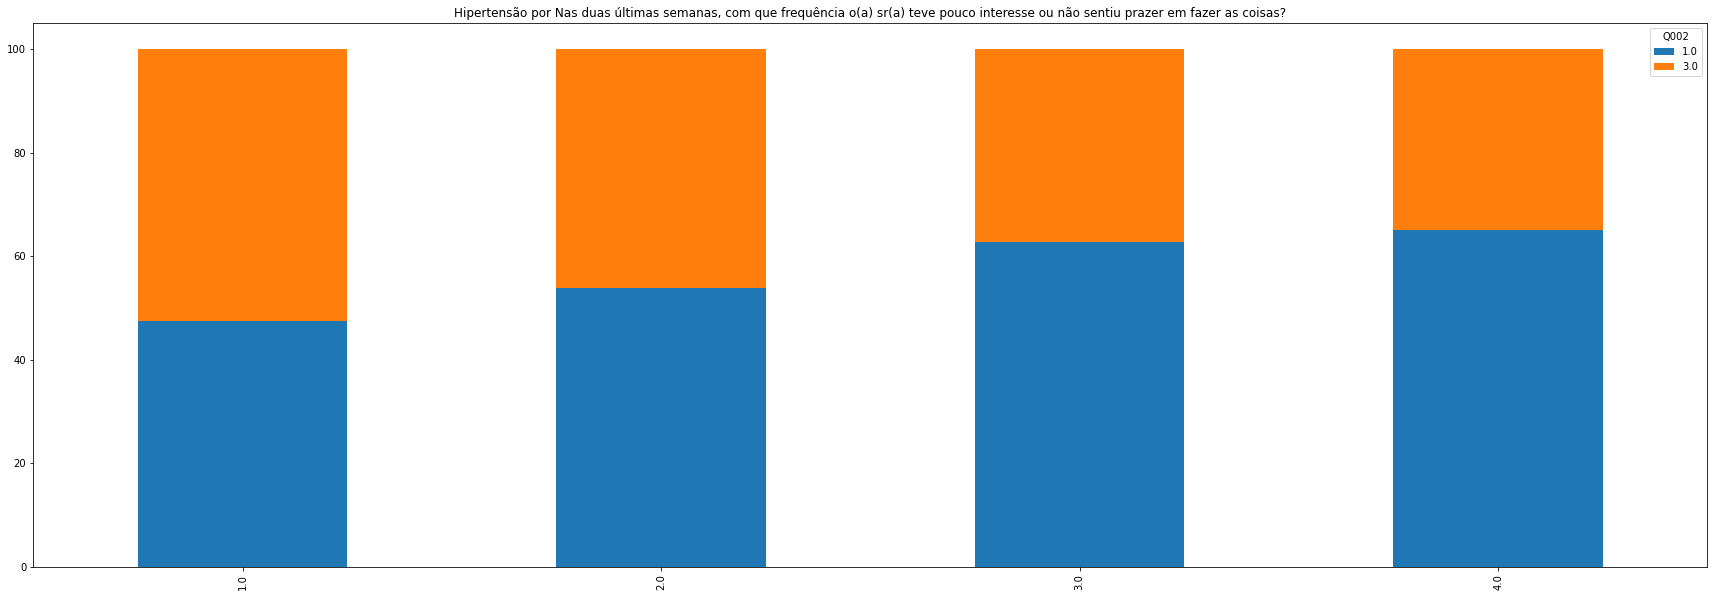

In [44]:
database.groupby(['N012', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve pouco interesse ou não sentiu prazer em fazer as coisas?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

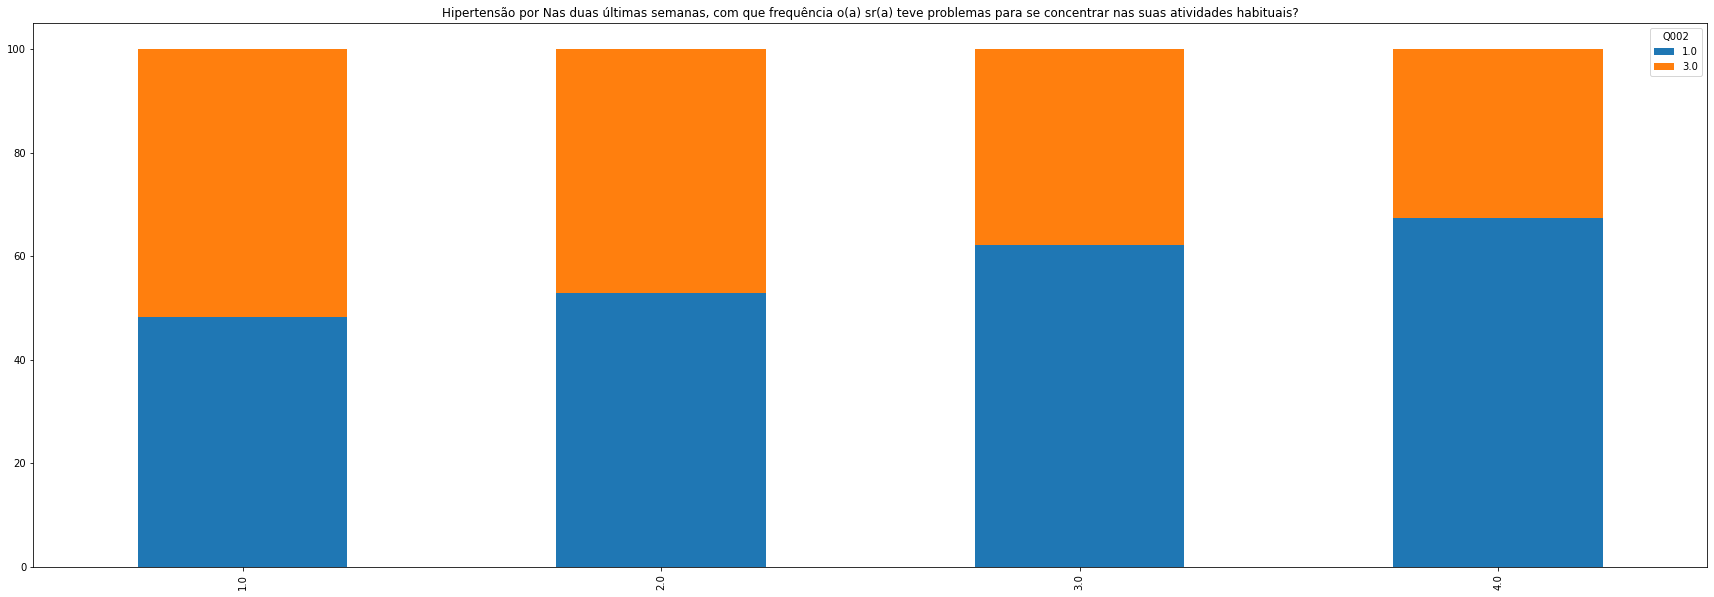

In [45]:
database.groupby(['N013', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas para se concentrar nas suas atividades habituais?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

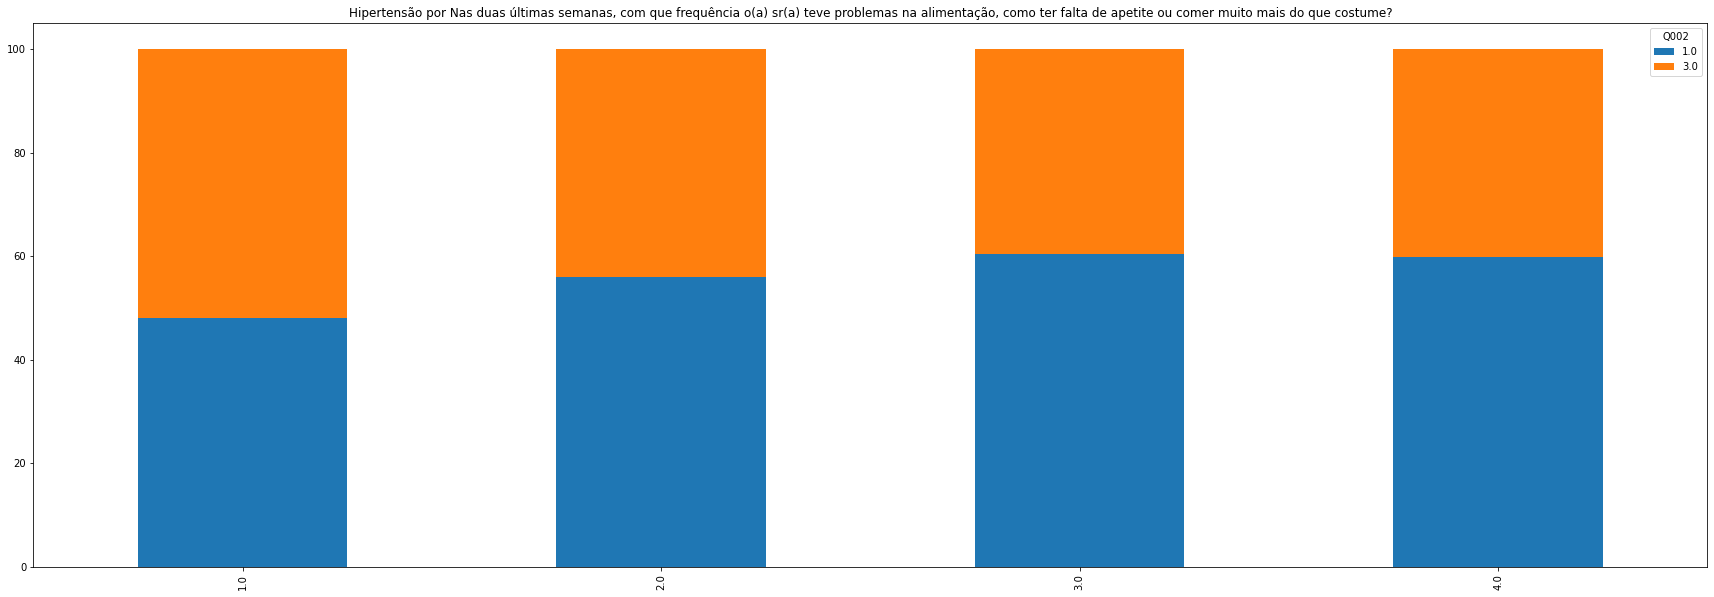

In [46]:
database.groupby(['N014', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve problemas na alimentação, como ter falta de apetite ou comer muito mais do que costume?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

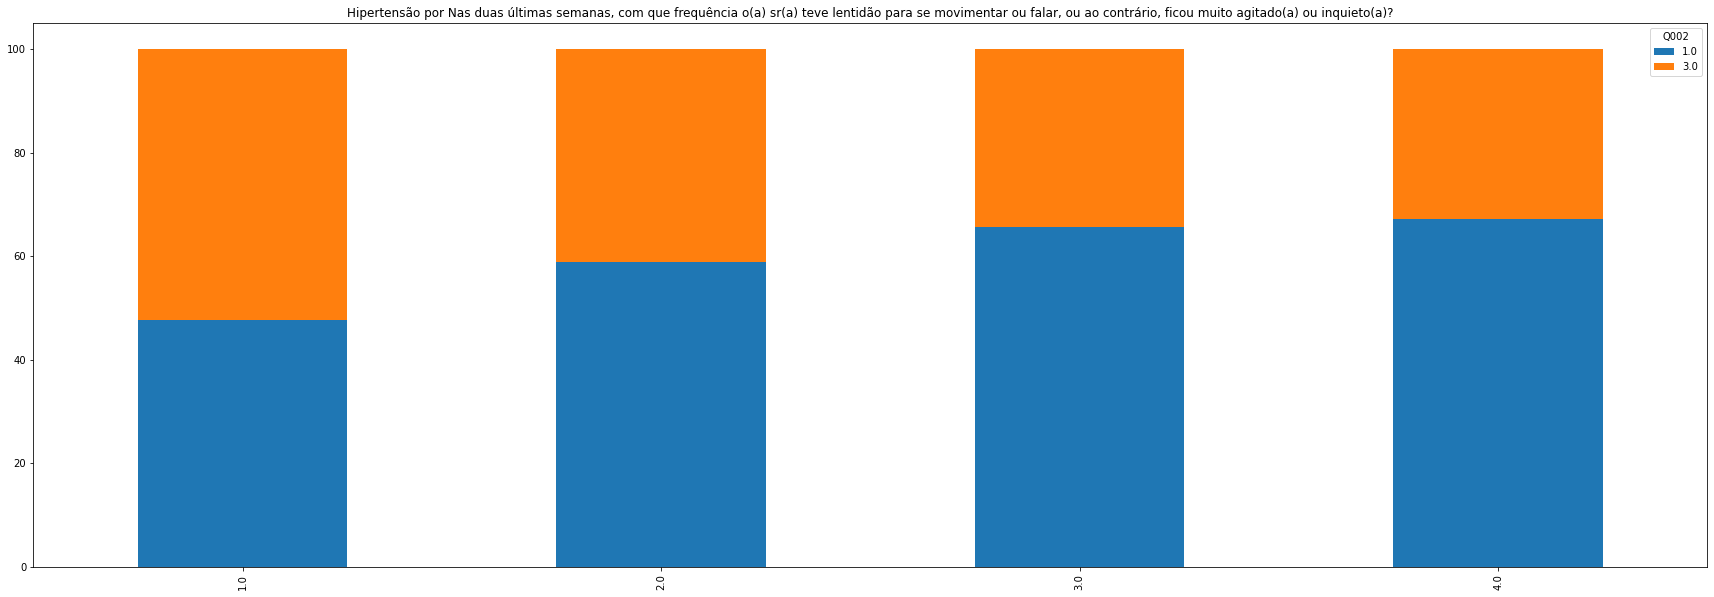

In [47]:
database.groupby(['N015', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) teve lentidão para se movimentar ou falar, ou ao contrário, ficou muito agitado(a) ou inquieto(a)?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

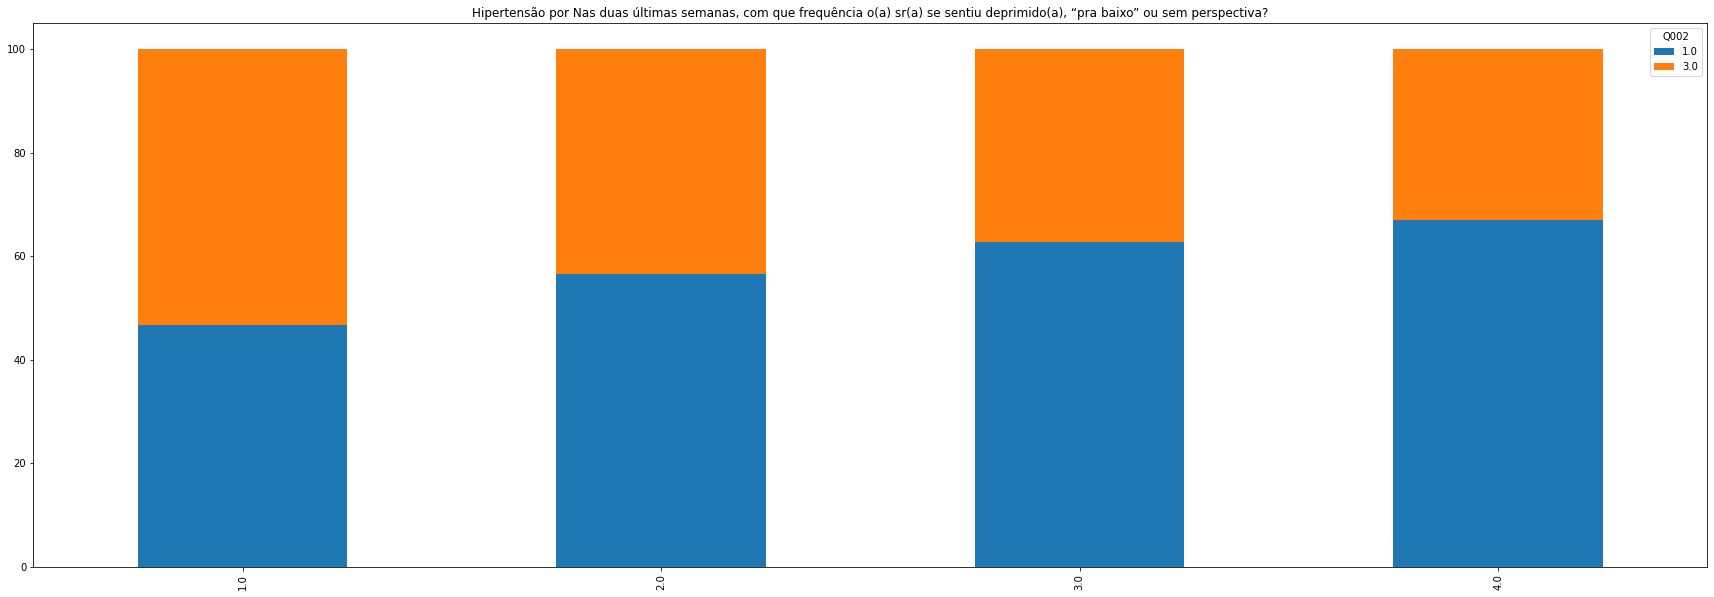

In [48]:
database.groupby(['N016', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) se sentiu deprimido(a), “pra baixo” ou sem perspectiva?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

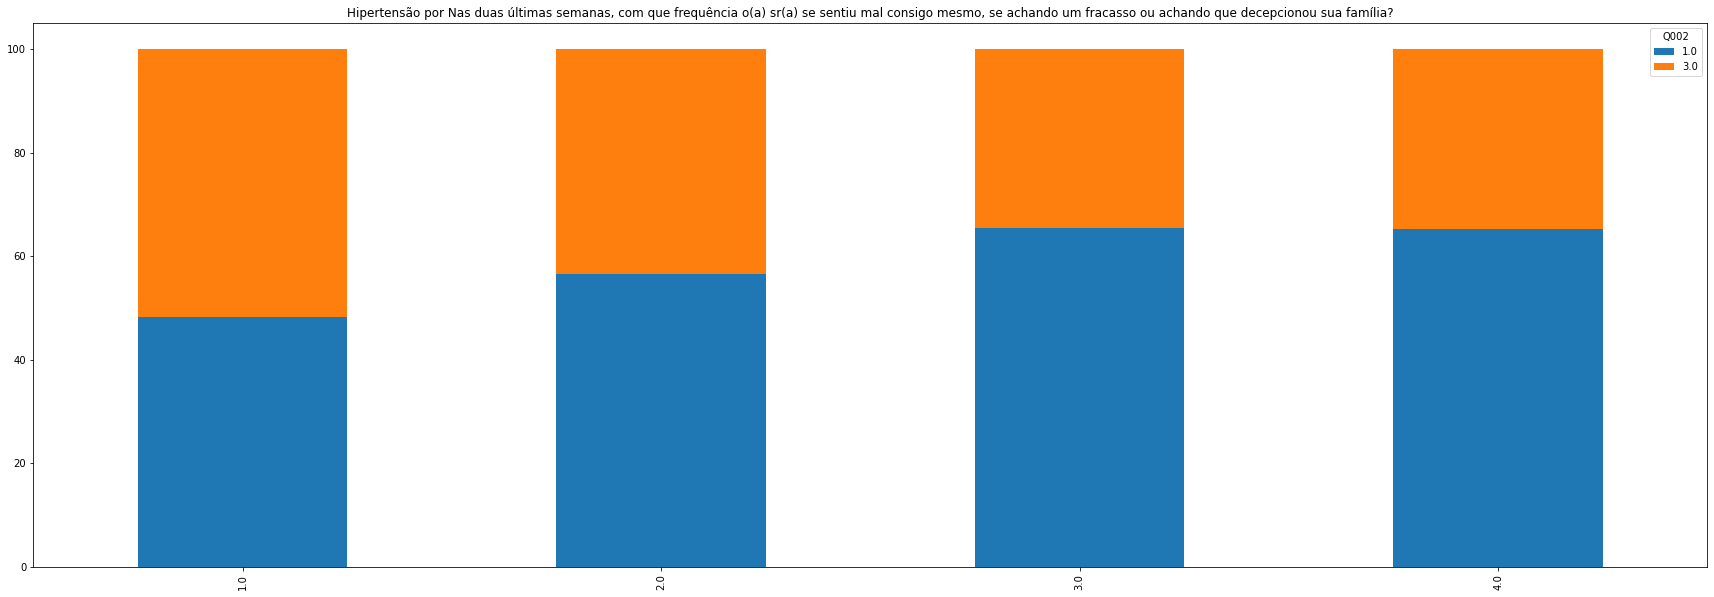

In [49]:
database.groupby(['N017', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) se sentiu mal consigo mesmo, se achando um fracasso ou achando que decepcionou sua família?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

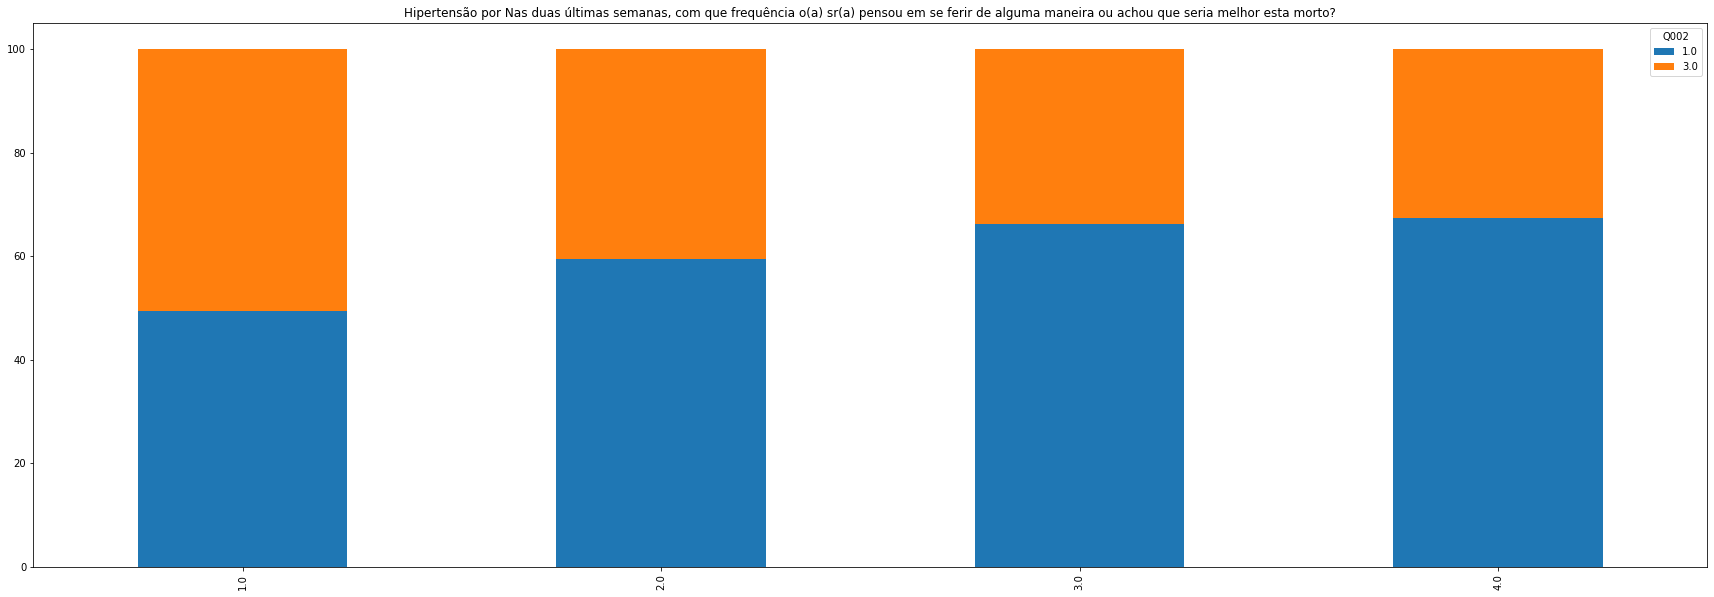

In [50]:
database.groupby(['N018', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por Nas duas últimas semanas, com que frequência o(a) sr(a) pensou em se ferir de alguma maneira ou achou que seria melhor esta morto?')
plt.xlabel("")
plt.show()

#1. Nenhum dia
#2. Menos da metade dos dias
#3. Mais da metade dos dias
#4. Quase todos os dias

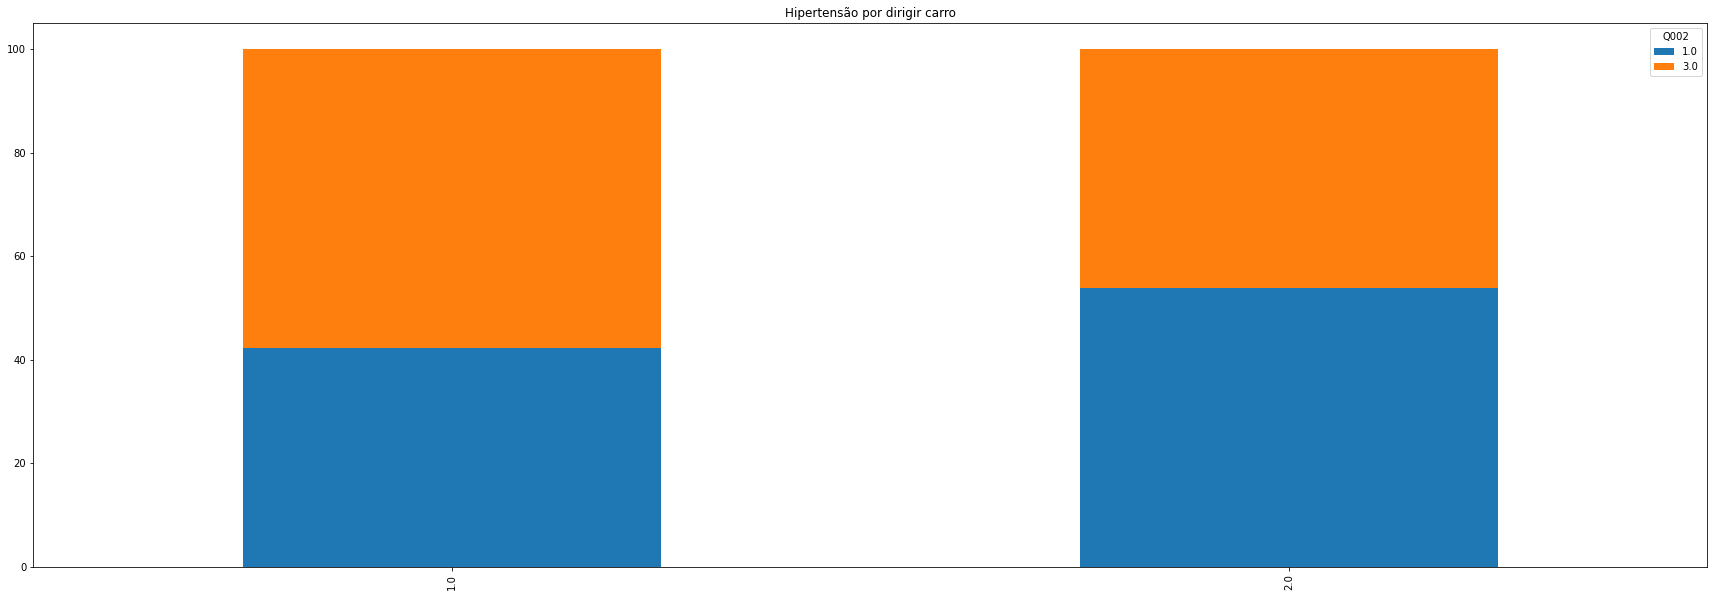

In [51]:
database.groupby(['O001', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por dirigir carro')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

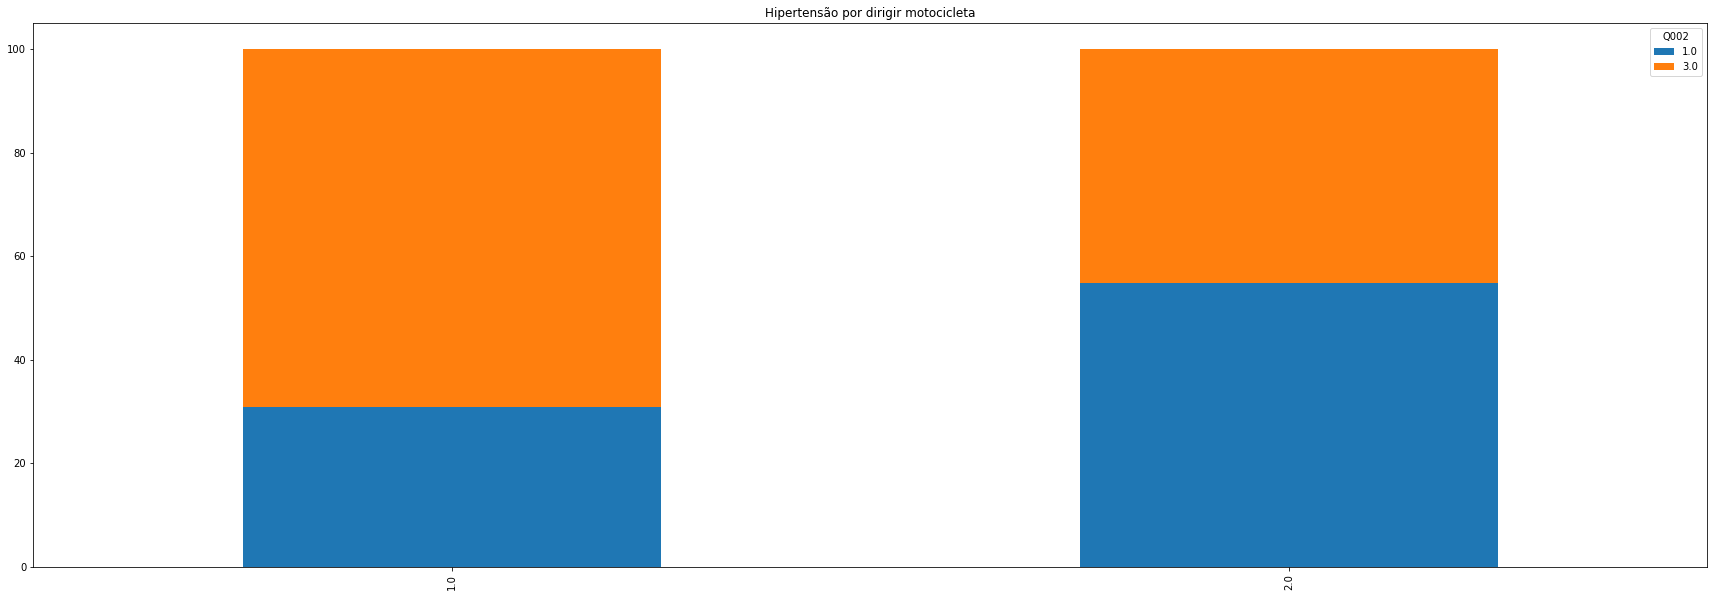

In [52]:
database.groupby(['O002', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por dirigir motocicleta')
plt.xlabel("")
plt.show()

# 1. Sim
# 2. Não

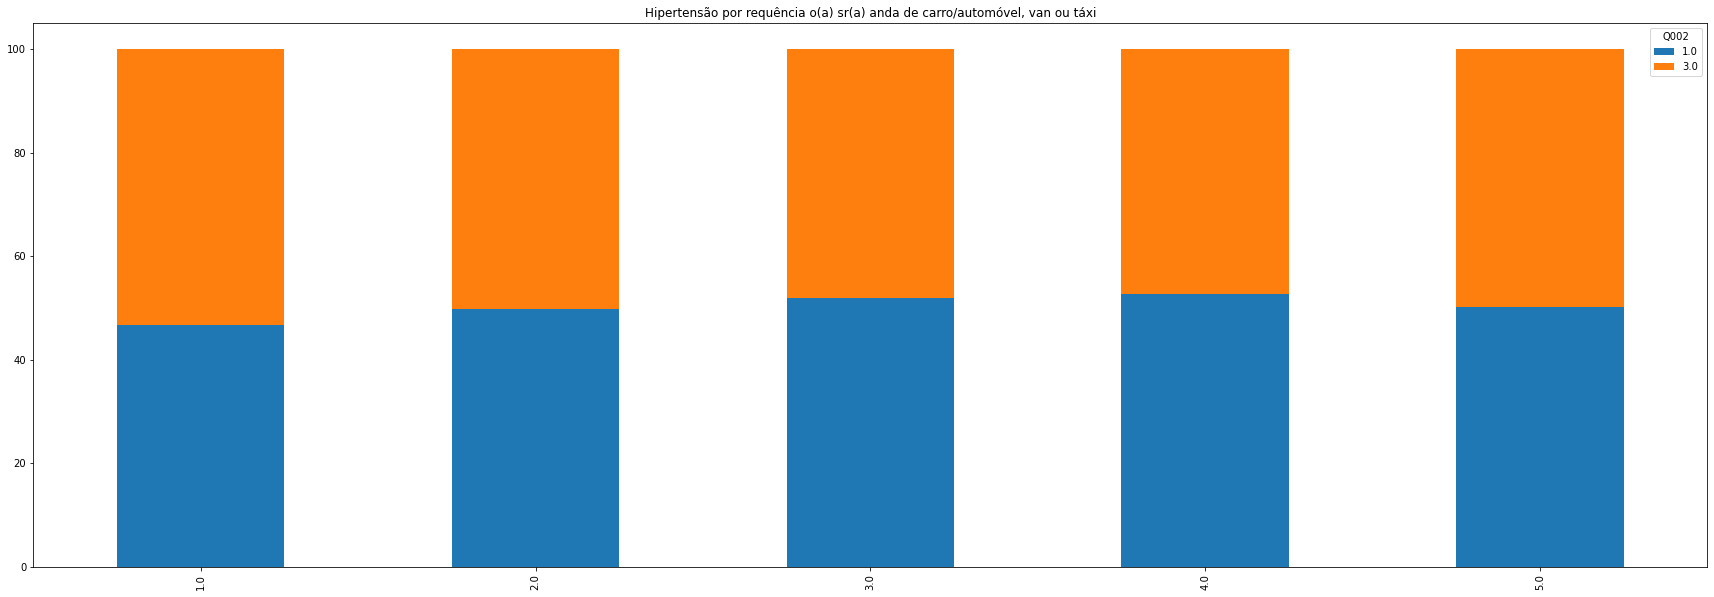

In [53]:
database.groupby(['O003', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por requência o(a) sr(a) anda de carro/automóvel, van ou táxi')
plt.xlabel("")
plt.show()

# 1. Sempre
# 2. Quase sempre
# 3. Às vezes
# 4. Raramente
# 5. Nunca

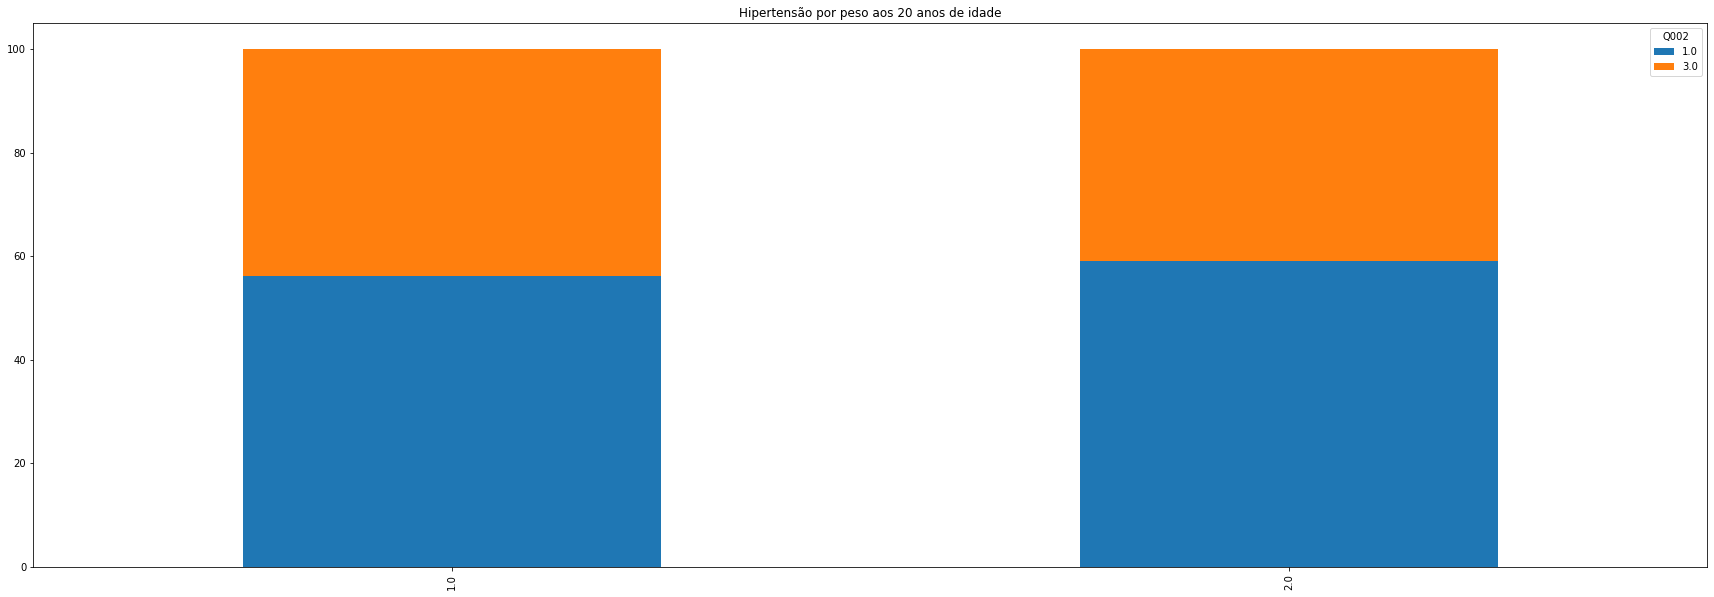

In [54]:
database.groupby(['P003', 'Q002']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Hipertensão por peso aos 20 anos de idade')
plt.xlabel("")
plt.show()

# 1. Sempre
# 2. Quase sempre
# 3. Às vezes
# 4. Raramente
# 5. Nunca

In [55]:
database['P029'].unique()

array(['.', '06', '04', '05', '08', '12', '20', '02', '03', '01', '10',
       '07', '50', '14', '15', '30', '24', '09', '40', '48', '19', '16',
       '36', '22', '13', '18', '25', '11', '28'], dtype=object)

# Executando algoritmo MLP para resultados preliminares

In [56]:
# Saída
hipertensos = database['Q002']
print(hipertensos.shape)
# holdout 80-20 para agilizar o resultado preliminar
out_treino = hipertensos.iloc[0:20000]
out_teste = hipertensos.iloc[20000:]

(25000,)


In [57]:
database.drop(columns=['Q002'], inplace=True)

In [59]:
df = database.fillna(value=0)
treino = df[0:20000]
teste = df[20000:]
X = treino.to_numpy()
X[X == '.'] = 0.0
X = X.astype(np.float64)

In [73]:
from sklearn.neural_network import MLPClassifier
#X = database.to_numpy()
#X = X.tolist()
#X = X.astype(np.float64)
Y = out_treino.to_numpy()
Y.astype(np.float64)
# usando a para o número de neurônios na hidden layer
# a = (num_entrada + num_saida) / 2
# a = (151 + 1) / 2 = 152 / 2 = 76
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(76), random_state=1)
clf.fit(X, Y)
X.astype(np.float64)

array([[11.,  2., 67., ...,  1.,  1.,  8.],
       [11.,  2., 32., ...,  1.,  2.,  4.],
       [11.,  2., 68., ...,  1.,  4.,  4.],
       ...,
       [14.,  2., 22., ...,  1.,  1.,  3.],
       [15.,  1., 21., ...,  1.,  4.,  4.],
       [53.,  1., 51., ...,  2.,  3.,  8.]])

In [74]:
#predicao = df.iloc[6267].to_numpy()
#predicao[predicao == '.'] = 0.0
#predicao = predicao.astype(np.float64)

X_teste = teste.to_numpy()
X_teste[X_teste == '.'] = 0.0
X_teste = X_teste.astype(np.float64)

Y_teste = out_teste.to_numpy()
Y_teste.astype(np.float64)

#esperado = Y[6267]
#print(predicao)
#print(esperado)
resultado = clf.predict(X_teste)

In [75]:
comparacao = resultado - Y_teste

In [76]:
sum = 0
for item in comparacao:
    if item == 0.0:
        sum = sum + 1
        
print("  Acertos:", sum)
print("    Erros:", (5000 - sum))
print("% acertos:", (sum/5000)*100, "%")

  Acertos: 2831
    Erros: 2169
% acertos: 56.620000000000005 %
